# 统计学习导论第四次作业
作业任务：完成建模流程  
由于作业五要选择信用评分属于【保守】的模型本次作业选择的是相反更为【激进】的银行长期贷款营销

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、业务理解

### 数据来源
阿里天池提供的【Banking Dataset Classification银行数据集分类】    
### 数据种类
分类数据，分类标签：客户是否已订阅定期存款    
### 数据网站
https://tianchi.aliyun.com/dataset/92775  
### 数据内容
银行定期存款营销——采用更为【激进】的策略  
### 数据类型：  
#### 15个特征：
1、age年龄 连续数据
2、job工作 分类数据
3、marital婚姻 分类数据
4、education教育情况 分类数据
5、default为履行的债务 分类数据
6、housing住房 分类数据
7、loan贷款 分类数据
8、contact联系类型 分类数据
9、month一年中的最后一个联系月份 分类数据
10、day_of_week一周中的最后一个联系日 分类数据
11、duration上一次联系时间 连续数据
12、campaign活动 连续数据
13、pdays天数 连续数据
14、previous之前联系的数量 连续数据
15、poutcome之前的结果 分类数据
#### 1个标签：
1、y客户是否已订阅定期存款 分类数据（是与否）

In [25]:
####--------------------------------统计学习导论第四次作业（建模流程）--------------------------------####

#--------------------------------1、业务理解--------------------------------#
import pandas as pd

## 数据导入
# 阿里天池提供的【Banking Dataset Classification银行数据集分类】
# 分类数据，分类标签：客户是否已订阅定期存款
# https://tianchi.aliyun.com/dataset/92775
data_train = pd.read_csv("/Users/ouyangruizhi/Desktop/python/统计学习导论/建模流程/new_train.csv")   # 用的绝对路径
data_test = pd.read_csv("/Users/ouyangruizhi/Desktop/python/统计学习导论/建模流程/new_test.csv")

# 展示前五行数据和数据形状
print('前五行数据：')
print(data_train.head())

print('数据形状：', data_train.shape)

前五行数据：
   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  no

## 二、数据探索
### 2.1 数据概览
由于输入和输出变量只有16个，可以绘制所有数据的可视化图  
其中对于数值型数据绘制直方图、对于分类数据绘制直条图

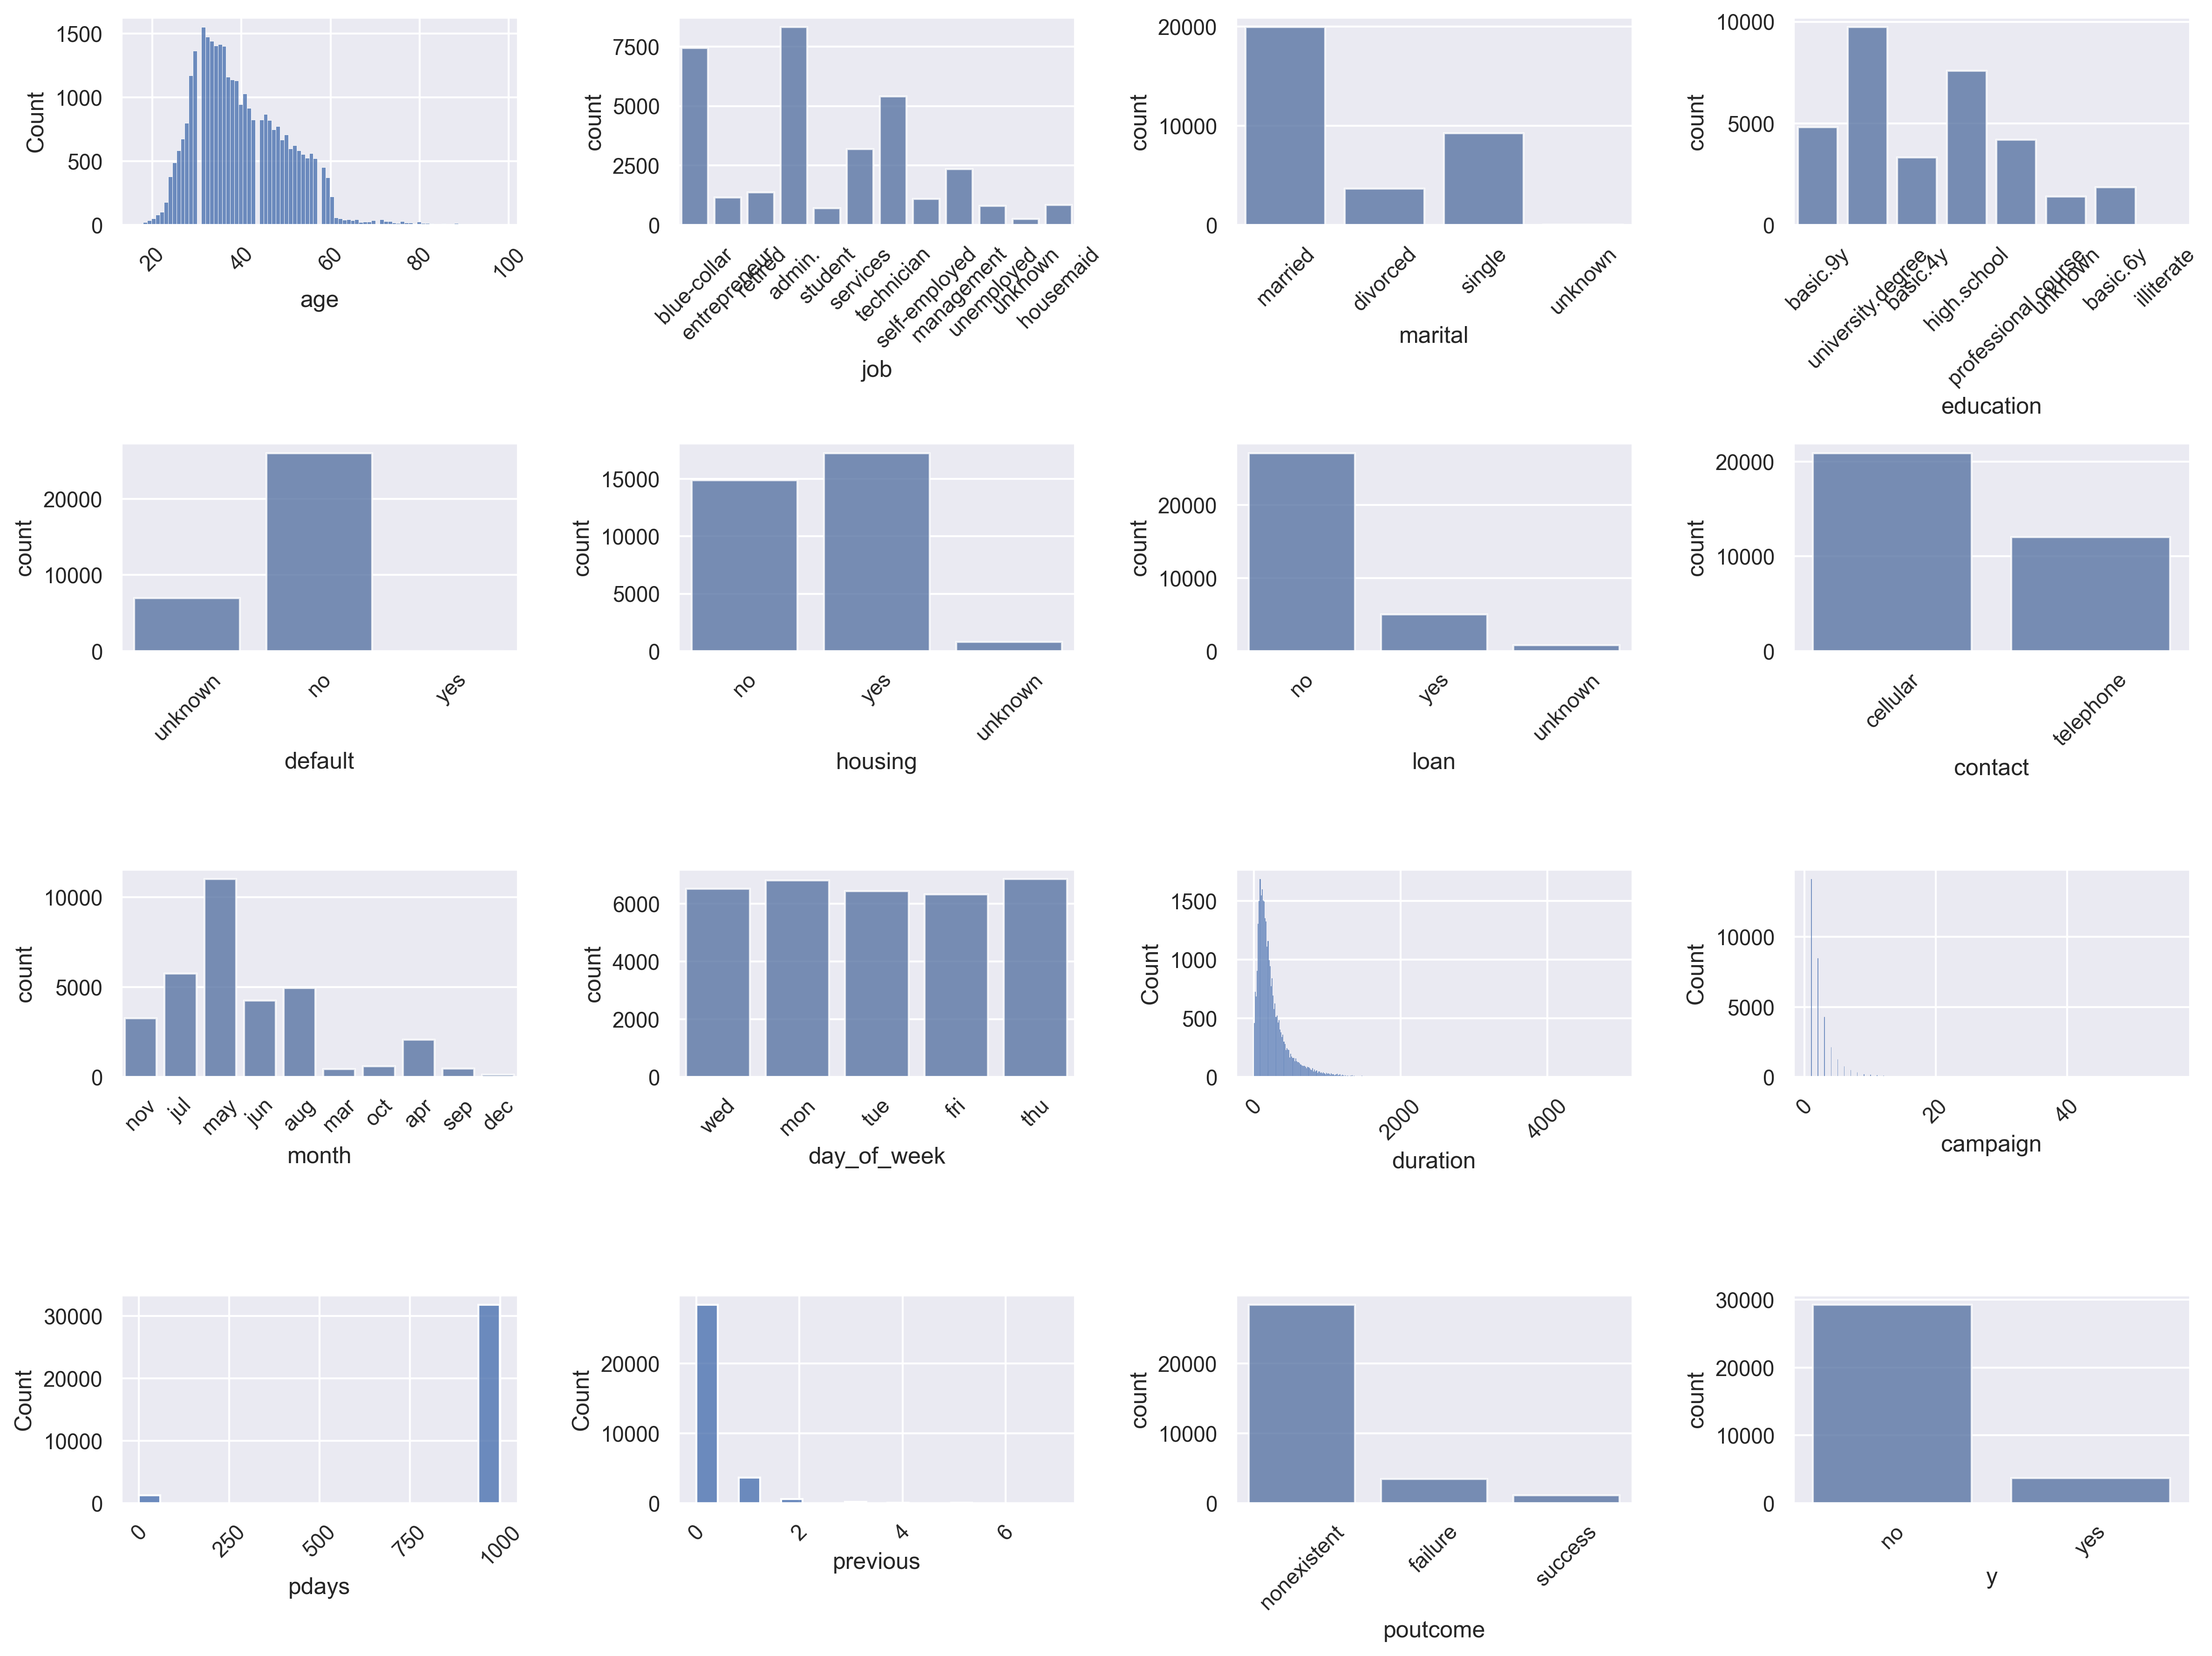

In [26]:
#--------------------------------2、数据探索--------------------------------#
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## 绘制全部指标的概览
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12), dpi = 300)
axes = axes.flatten()

columns = ['age', 'job','marital', 'education', 'default', 'housing', 'loan', 'contact',
                   'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# 循环绘制每个子图
for i, column in enumerate(columns):
    if column in ['age', 'duration', 'campaign', 'pdays', 'previous']:
        # 对于连续数据，使用histplot
        g = sns.histplot(data=data_train, x=column, color='b', alpha=0.8, ax=axes[i])
    else:
        # 对于分类数据，使用countplot
        g = sns.countplot(data=data_train, x=column, color='b', alpha=0.8, ax=axes[i])

    locator = axes[i].get_xticks()
    axes[i].xaxis.set_major_locator(plt.FixedLocator(locator))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for j in range(len(columns), 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(fname="数据概览.png")

## 2.2 重要单指标的密度函数
由于数值型数据只有5个，直接绘制所有数值型数据的密度函数

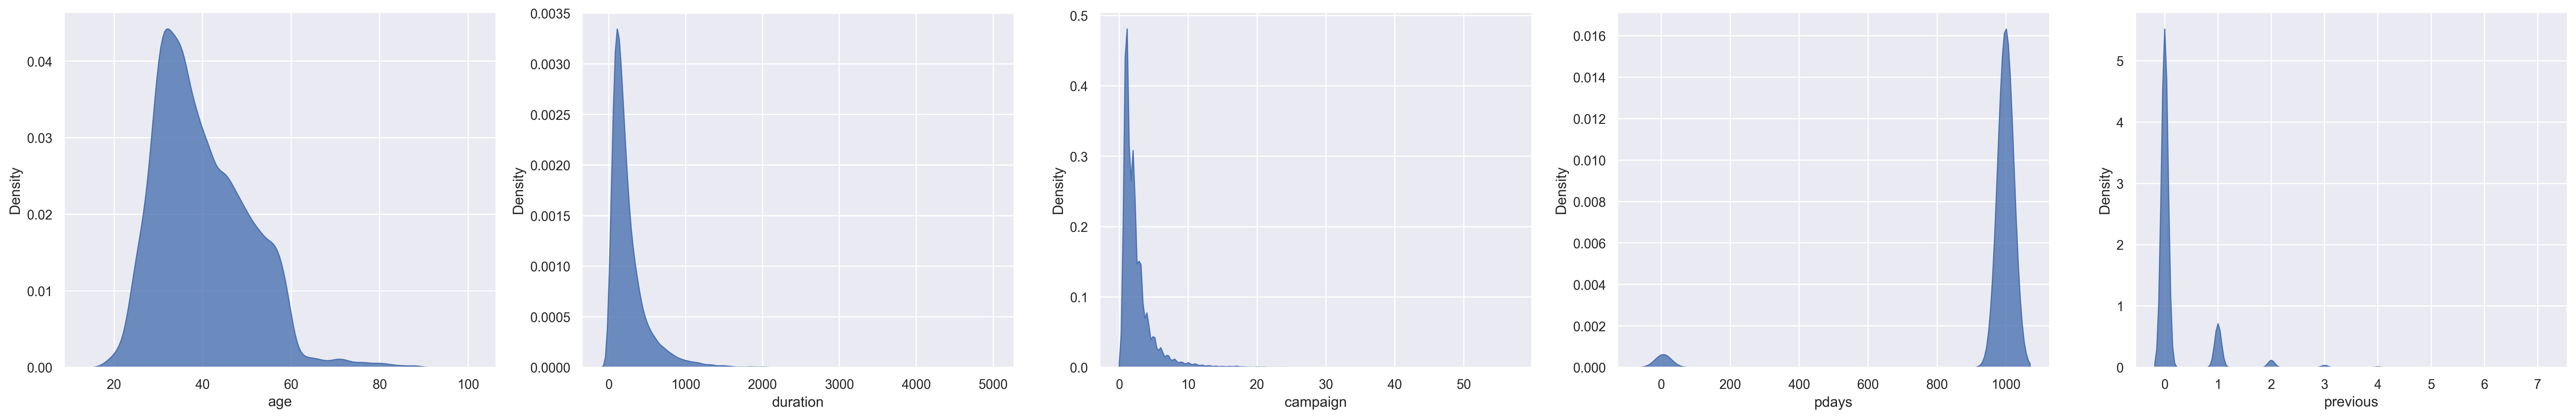

In [27]:
## 绘制重要单指标的密度函数
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5), dpi = 300)
axes = axes.flatten()

indicators = ['age', 'duration', 'campaign', 'pdays', 'previous']

for i, indicator in enumerate(indicators):
    g_age_density = sns.kdeplot(data=data_train, x=indicator, fill=True, color='b', alpha=0.8, ax=axes[i])
    axes[i].set_xlabel(indicators[i])
    axes[i].set_ylabel("Density")

for j in range(len(indicators), 5):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(fname="指标密度函数图.png")


## 2.3 Box-Cox变换
观察到数据没有符合正态分布的数据，使用Box-Cox变换，将非正态分布的数据转换为近似正态分布的数据。  
Box-Cox变换公式：
$$
y^{(\lambda)} = \left\{\begin{matrix} \frac{y^{\lambda}-1}{\lambda} &\lambda \neq 0 \\ ln(y) &\lambda = 0 \end{matrix}\right.
$$
变换需要满足：
$$
\frac{y_{max}}{y_{min}} > 2
$$
对age直接做强度稍为更大的对数变换、由于duration、campaign存在'0'所以退而求其次做强度稍为更小的平方根变换、pdays和previous存在多峰的情况因此不做变换

前五行数据：
   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y    ln_age  sqrt_duration  sqrt_campaign  
0  nonexistent   no  3.891820      15.066519       2.

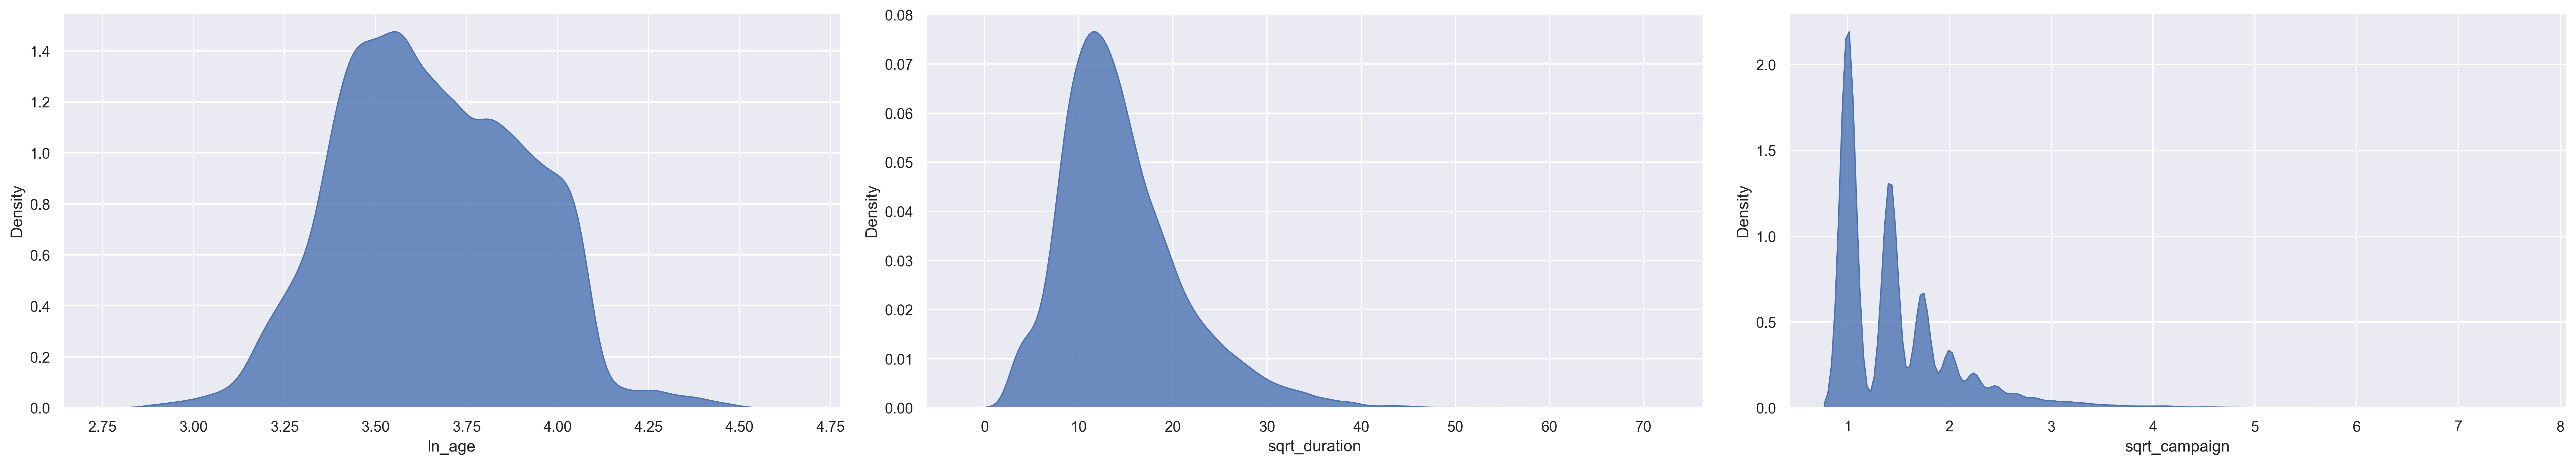

In [28]:
## BOX-COX变换
# 对age列进行对数变换
data_train['ln_age'] = np.log(data_train['age'])
data_train['sqrt_duration'] = np.sqrt(data_train['duration'])
data_train['sqrt_campaign'] = np.sqrt(data_train['campaign'])

print('前五行数据：')
print(data_train.head())

# 绘制变换后的密度函数
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27, 5), dpi = 300)
axes = axes.flatten()

# 指标列表及对应的坐标轴标签
indicators = ['ln_age', 'sqrt_duration', 'sqrt_campaign']

for i, indicator in enumerate(indicators):
    g_age_density = sns.kdeplot(data=data_train, x=indicator, fill=True, color='b', alpha=0.8, ax=axes[i])
    axes[i].set_xlabel(indicators[i])
    axes[i].set_ylabel("Density")

for j in range(len(indicators), 3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(fname="变换后的密度函数图.png")


可以看到：变换后的age相对正态了、duration相对右偏

## 三、数据预处理
### 3.1 定性数据转换为定量数据

In [29]:
#--------------------------------3、数据预处理--------------------------------#
from sklearn.tree import DecisionTreeClassifier

## 定性数据转换为定量数据
# 工作选项
JOB = { 'admin.': 1, 'blue-collar': 2,'entrepreneur': 3,
        'housemaid': 4, 'management': 5, 'retired': 6,
        'self-employed': 7, 'services': 8, 'student': 9,
        'technician': 10, 'unemployed': 11, 'unknown': np.nan}
# 婚姻
MARRY = {'divorced': 1, 'married': 2, 'single': 3,'unknown': np.nan}
# 教育
EDU = {'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
       'high.school': 4, 'illiterate': 5, 'professional.course': 6,
       'university.degree': 7, 'unknown': np.nan}
# 违约信用
DEFAULT = {'no': 1,'yes': 2, 'unknown': np.nan}
# 住房贷款
HOUSE_LOAN = {'no': 1, 'yes': 2, 'unknown': np.nan}
# 个人贷款
PER_LOAN = {'no': 1, 'yes': 2, 'unknown': np.nan}
# 接听电话类型
TELE_TYPE = {'cellular': 1,'telephone': 2}
# 最后一次接触月份
LAST_CONTACT_MON = {'nov': 11, 'jul': 7, 'may': 5,
                    'jun': 6, 'aug': 8, 'mar': 3,
                    'oct': 10, 'apr': 4, 'sep': 9,
                    'dec': 12}
# 最后一次接触的星期数
LAST_CONTACT_WEEK = {'mon': 1,'tue': 2, 'wed': 3,
                     'thu': 4, 'fri': 5}
# 前一次接触结果
LAST_CONTACT_POUTCOME = {'failure': 0, 'nonexistent': 1, 'success': 2}
# 预测值
LABELS = {'yes': 1,'no': 0}

# 将 y 名字改为 label, 方便以后操作
data_train.rename(columns={"y": "labels"}, inplace=True)

# 将所有定性数据改为定量数据，找到为 unknow 的元素，缺失值，去掉或用指定值填充
data_train.loc[data_train['job']=='admin.']

data_train["job"].replace(JOB, inplace=True)
data_train["marital"].replace(MARRY, inplace=True)
data_train["education"].replace(EDU, inplace=True)
data_train["default"].replace(DEFAULT, inplace=True)
data_train["housing"].replace(HOUSE_LOAN, inplace=True)
data_train["loan"].replace(PER_LOAN, inplace=True)
data_train["contact"].replace(TELE_TYPE, inplace=True)
data_train["month"].replace(LAST_CONTACT_MON, inplace=True)
data_train["day_of_week"].replace(LAST_CONTACT_WEEK, inplace=True)
data_train["poutcome"].replace(LAST_CONTACT_POUTCOME, inplace=True)
data_train["labels"].replace(LABELS, inplace=True)

print('定性数据转换后前五行数据：')
print(data_train.head())

定性数据转换后前五行数据：
   age  job  marital  education  default  housing  loan  contact  month  \
0   49  2.0      2.0        3.0      NaN      1.0   1.0        1     11   
1   37  3.0      2.0        7.0      1.0      1.0   1.0        2     11   
2   78  6.0      2.0        1.0      1.0      1.0   1.0        1      7   
3   36  1.0      2.0        7.0      1.0      2.0   1.0        2      5   
4   59  6.0      1.0        7.0      1.0      1.0   1.0        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  labels  \
0            3       227         4    999         0         1       0   
1            3       202         2    999         1         0       0   
2            1      1148         1    999         0         1       1   
3            1       120         2    999         0         1       0   
4            2       368         2    999         0         1       0   

     ln_age  sqrt_duration  sqrt_campaign  
0  3.891820      15.066519       2.000000  
1  3.610

### 3.2 异常值检测与处理
这一步对于连续数据而言做箱线图、3$\sigma$法则；对于分类数据认为没有异常值接受各种分类情况
#### 3.2.1 箱线图

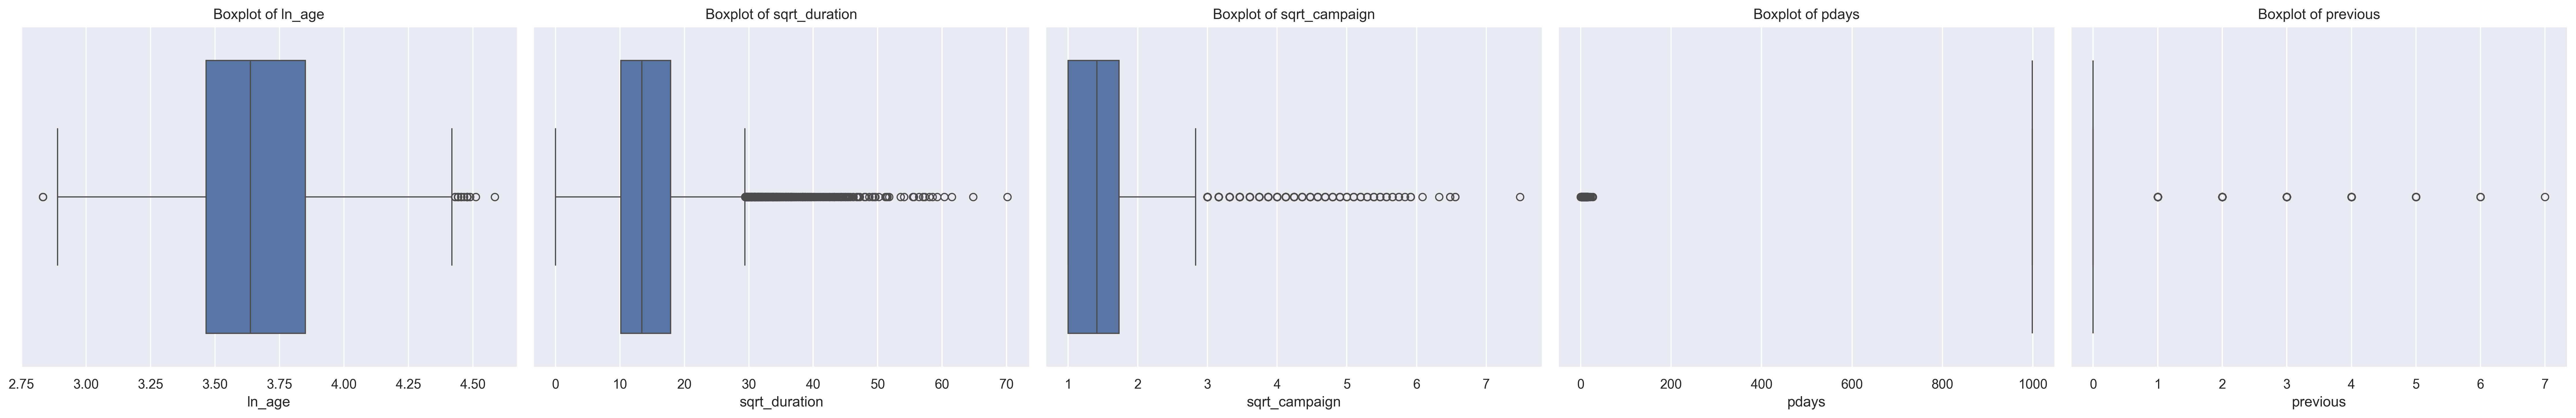

In [30]:
## 异常值检测与处理
# 对于连续数据而言，做箱线图
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5), dpi=300)

g_ln_age_box = sns.boxplot(data=data_train, x='ln_age', ax=axes[0])
axes[0].set_title('Boxplot of ln_age')

g_ln_duration_box = sns.boxplot(data=data_train, x='sqrt_duration', ax=axes[1])
axes[1].set_title('Boxplot of sqrt_duration')

g_ln_campaign_box = sns.boxplot(data=data_train, x='sqrt_campaign', ax=axes[2])
axes[2].set_title('Boxplot of sqrt_campaign')

g_pdays_box = sns.boxplot(data=data_train, x='pdays', ax=axes[3])
axes[3].set_title('Boxplot of pdays')

g_previous_box = sns.boxplot(data=data_train, x='previous', ax=axes[4])
axes[4].set_title('Boxplot of previous')

plt.tight_layout()
plt.savefig(fname="连续数据箱线图.png")

#### 3.2.2 3$\sigma$法则

In [31]:
# 3sigma外检测
continuous_columns = ['ln_age', 'sqrt_duration', 'sqrt_campaign', 'pdays', 'previous']

for column in continuous_columns:
    mean_value = data_train[column].mean()
    std_value = data_train[column].std()
    lower_bound = mean_value - 3 * std_value
    upper_bound = mean_value + 3 * std_value
    outlier_count = data_train[(data_train[column] < lower_bound) | (data_train[column] > upper_bound)].shape[0]
    print(f"{column}列3sigma外离群值个数为: {outlier_count}")

ln_age列3sigma外离群值个数为: 81
sqrt_duration列3sigma外离群值个数为: 407
sqrt_campaign列3sigma外离群值个数为: 545
pdays列3sigma外离群值个数为: 1226
previous列3sigma外离群值个数为: 861


#### 3.2.3 异常值处理
变量其异常值具有特殊意义便不做处理

### 3.3 缺失值检测与处理
#### 3.3.1 缺失值情况

In [32]:
## 缺失值检测与处理
print('缺失值情况及比例：')
total_rows = data_train.shape[0]
missing_value_sums = data_train.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

缺失值情况及比例：
age: 缺失值数量为 0，缺失值比例为 0.00%
job: 缺失值数量为 265，缺失值比例为 0.80%
marital: 缺失值数量为 65，缺失值比例为 0.20%
education: 缺失值数量为 1397，缺失值比例为 4.24%
default: 缺失值数量为 6940，缺失值比例为 21.06%
housing: 缺失值数量为 796，缺失值比例为 2.42%
loan: 缺失值数量为 796，缺失值比例为 2.42%
contact: 缺失值数量为 0，缺失值比例为 0.00%
month: 缺失值数量为 0，缺失值比例为 0.00%
day_of_week: 缺失值数量为 0，缺失值比例为 0.00%
duration: 缺失值数量为 0，缺失值比例为 0.00%
campaign: 缺失值数量为 0，缺失值比例为 0.00%
pdays: 缺失值数量为 0，缺失值比例为 0.00%
previous: 缺失值数量为 0，缺失值比例为 0.00%
poutcome: 缺失值数量为 0，缺失值比例为 0.00%
labels: 缺失值数量为 0，缺失值比例为 0.00%
ln_age: 缺失值数量为 0，缺失值比例为 0.00%
sqrt_duration: 缺失值数量为 0，缺失值比例为 0.00%
sqrt_campaign: 缺失值数量为 0，缺失值比例为 0.00%


#### 3.3.2 缺失比例小于5%的处理
直接中位数插补

In [33]:
# 对于缺失比例小于5%，采用中位数直接插补
variables_to_impute = ['job','marital', 'education', 'housing', 'loan']

for variable in variables_to_impute:
    missing_proportion = missing_value_proportions[variable]
    if missing_proportion < 5:
        median_value = data_train[variable].median()
        data_train[variable].fillna(median_value, inplace=True)

#### 3.3.3 缺失值比例在20%左右的处理
先使用WOE将分类数据转换为数值型数据  
再以年龄为依据，对变量进行分组，（13个观测一组左右）  
最后在组内进行中位数插补

In [34]:
# 对于缺失比例较高的default，先用WOE处理，再分组，再在组内使用中位数插补
# WOE
def woe_transformation(data, categorical_cols):
    """
    对指定的分类变量列进行WOE处理

    :param data: 包含数据的DataFrame
    :param categorical_cols: 需要进行WOE处理的分类变量列名列表
    :return: 处理后的DataFrame
    """
    for col in categorical_cols:
        # 对分类变量进行分组并计算好坏样本数
        good_count = data.groupby(col)['labels'].sum()
        total_count = data.groupby(col)['labels'].count()
        bad_count = total_count - good_count

        woe_df = pd.DataFrame({
            'good_count': good_count,
            'total_count': total_count,
            'bad_count': bad_count
        })

        # 计算每组的WOE值
        woe_df['p_good'] = woe_df['good_count'] / woe_df['good_count'].sum()
        woe_df['p_bad'] = woe_df['bad_count'] / woe_df['bad_count'].sum()
        woe_df['WOE'] = np.log(woe_df['p_good'] / woe_df['p_bad'])

        woe_dict = woe_df['WOE'].to_dict()
        data[f'{col}_woe'] = data[col].map(woe_dict)

    return data

categorical_cols = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' ,'labels']
data_train = woe_transformation(data_train, categorical_cols)

# 按年龄分组
min_age = data_train['ln_age'].min()
max_age = data_train['ln_age'].max()
num_groups = 3000

group_width = (max_age - min_age) / num_groups

group_labels = []
for i in range(num_groups):
    lower_bound = min_age + i * group_width
    upper_bound = min_age + (i + 1) * group_width
    group_labels.append(f'Group_{i + 1}: {lower_bound:.2f}-{upper_bound:.2f}')

data_train['age_group'] = pd.cut(data_train['ln_age'], bins=num_groups, labels=group_labels)

# 中位数插补
for group in data_train['age_group'].unique():
    group_data = data_train[data_train['age_group'] == group]
    median_value = group_data['default_woe'].median()
    data_train.loc[(data_train['age_group'] == group) & (data_train['default_woe'].isnull()), 'default_woe'] = median_value

data_train = data_train.drop(columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                                      'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                                      'poutcome', 'labels_woe','age_group'])

data_train['default_woe'] = data_train['default_woe'].median()

/Users/ouyangruizhi/miniconda3/envs/oyrz/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ouyangruizhi/miniconda3/envs/oyrz/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ouyangruizhi/miniconda3/envs/oyrz/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


忽略以上警告、问题不大、主要是不建议我对数变换
### 3.4 归一化
再次不做归一化处理

In [35]:
# # 归一化
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# MinMaxScaler_feature = ['previous', 'ln_age', 'sqrt_duration', 'sqrt_campaign',
#                         'job_woe', 'marital_woe', 'education_woe', 'default_woe',
#                         'housing_woe','loan_woe', 'contact_woe', 'month_woe',
#                         'day_of_week_woe','poutcome_woe']

# features_to_scale = data_train[MinMaxScaler_feature]
# features_to_scale.to_csv("features_to_scale.csv", index=False)
# scaled_features = scaler.fit_transform(features_to_scale)
# data_train[MinMaxScaler_feature] = pd.DataFrame(scaled_features, columns=MinMaxScaler_feature)

# print(data_train.head())
# print(data_train.columns)

### 3.4 变量过滤
#### 3.4.1 低方差过滤法

In [36]:
## 变量过滤
# 低方差过滤法
from sklearn.feature_selection import VarianceThreshold

threshold = 0.05 # 阈值

selector = VarianceThreshold(threshold=threshold)
selector.fit(data_train.drop('labels', axis=1))

selected_columns = data_train.drop('labels', axis=1).columns[selector.get_support()]

data_train_low_var = data_train[['labels'] + list(selected_columns)]

print("经过低方差过滤后的数据形状：", data_train_low_var.shape)
print(data_train_low_var.head())
print('所包含的变量', data_train_low_var.columns)

经过低方差过滤后的数据形状： (32950, 9)
   labels  previous    ln_age  sqrt_duration  sqrt_campaign   job_woe  \
0       0         0  3.891820      15.066519       2.000000 -0.534972   
1       0         1  3.610918      14.212670       1.414214 -0.209699   
2       1         0  4.356709      33.882149       1.000000  0.990506   
3       0         0  3.583519      10.954451       1.414214  0.151384   
4       0         0  4.077537      19.183326       1.414214  0.990506   

   contact_woe  month_woe  poutcome_woe  
0     0.305771  -0.115089     -0.274233  
1    -0.819483  -0.115089      0.281971  
2     0.305771  -0.221816     -0.274233  
3    -0.819483  -0.627514     -0.274233  
4     0.305771  -0.091391     -0.274233  
所包含的变量 Index(['labels', 'previous', 'ln_age', 'sqrt_duration', 'sqrt_campaign',
       'job_woe', 'contact_woe', 'month_woe', 'poutcome_woe'],
      dtype='object')


通过低方差过滤法，将15个输入变量减少为9个输入变量
#### 3.4.2 高相关过滤法

In [37]:
# 高相关过滤法
corr_matrix = data_train_low_var.drop('labels', axis=1).corr()
corr_threshold = 0.8 # 阈值

columns_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > corr_threshold:
            columns_to_drop.append(corr_matrix.columns[j])

columns_to_drop = list(set(columns_to_drop))

data_train = data_train_low_var.drop(columns=columns_to_drop)

print("经过高相关过滤后的数据形状：", data_train.shape)
print(data_train.head())
print('所包含的变量', data_train.columns)

经过高相关过滤后的数据形状： (32950, 9)
   labels  previous    ln_age  sqrt_duration  sqrt_campaign   job_woe  \
0       0         0  3.891820      15.066519       2.000000 -0.534972   
1       0         1  3.610918      14.212670       1.414214 -0.209699   
2       1         0  4.356709      33.882149       1.000000  0.990506   
3       0         0  3.583519      10.954451       1.414214  0.151384   
4       0         0  4.077537      19.183326       1.414214  0.990506   

   contact_woe  month_woe  poutcome_woe  
0     0.305771  -0.115089     -0.274233  
1    -0.819483  -0.115089      0.281971  
2     0.305771  -0.221816     -0.274233  
3    -0.819483  -0.627514     -0.274233  
4     0.305771  -0.091391     -0.274233  
所包含的变量 Index(['labels', 'previous', 'ln_age', 'sqrt_duration', 'sqrt_campaign',
       'job_woe', 'contact_woe', 'month_woe', 'poutcome_woe'],
      dtype='object')


高相关过滤法并没有继续过滤变量
### 3.5 变量聚类
#### 3.5.1 计算输入的皮尔森相关系数

/var/folders/nk/ybyq6yb13njgrdf270gg6j2m0000gn/T/ipykernel_4951/3897554323.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), fontsize=12)


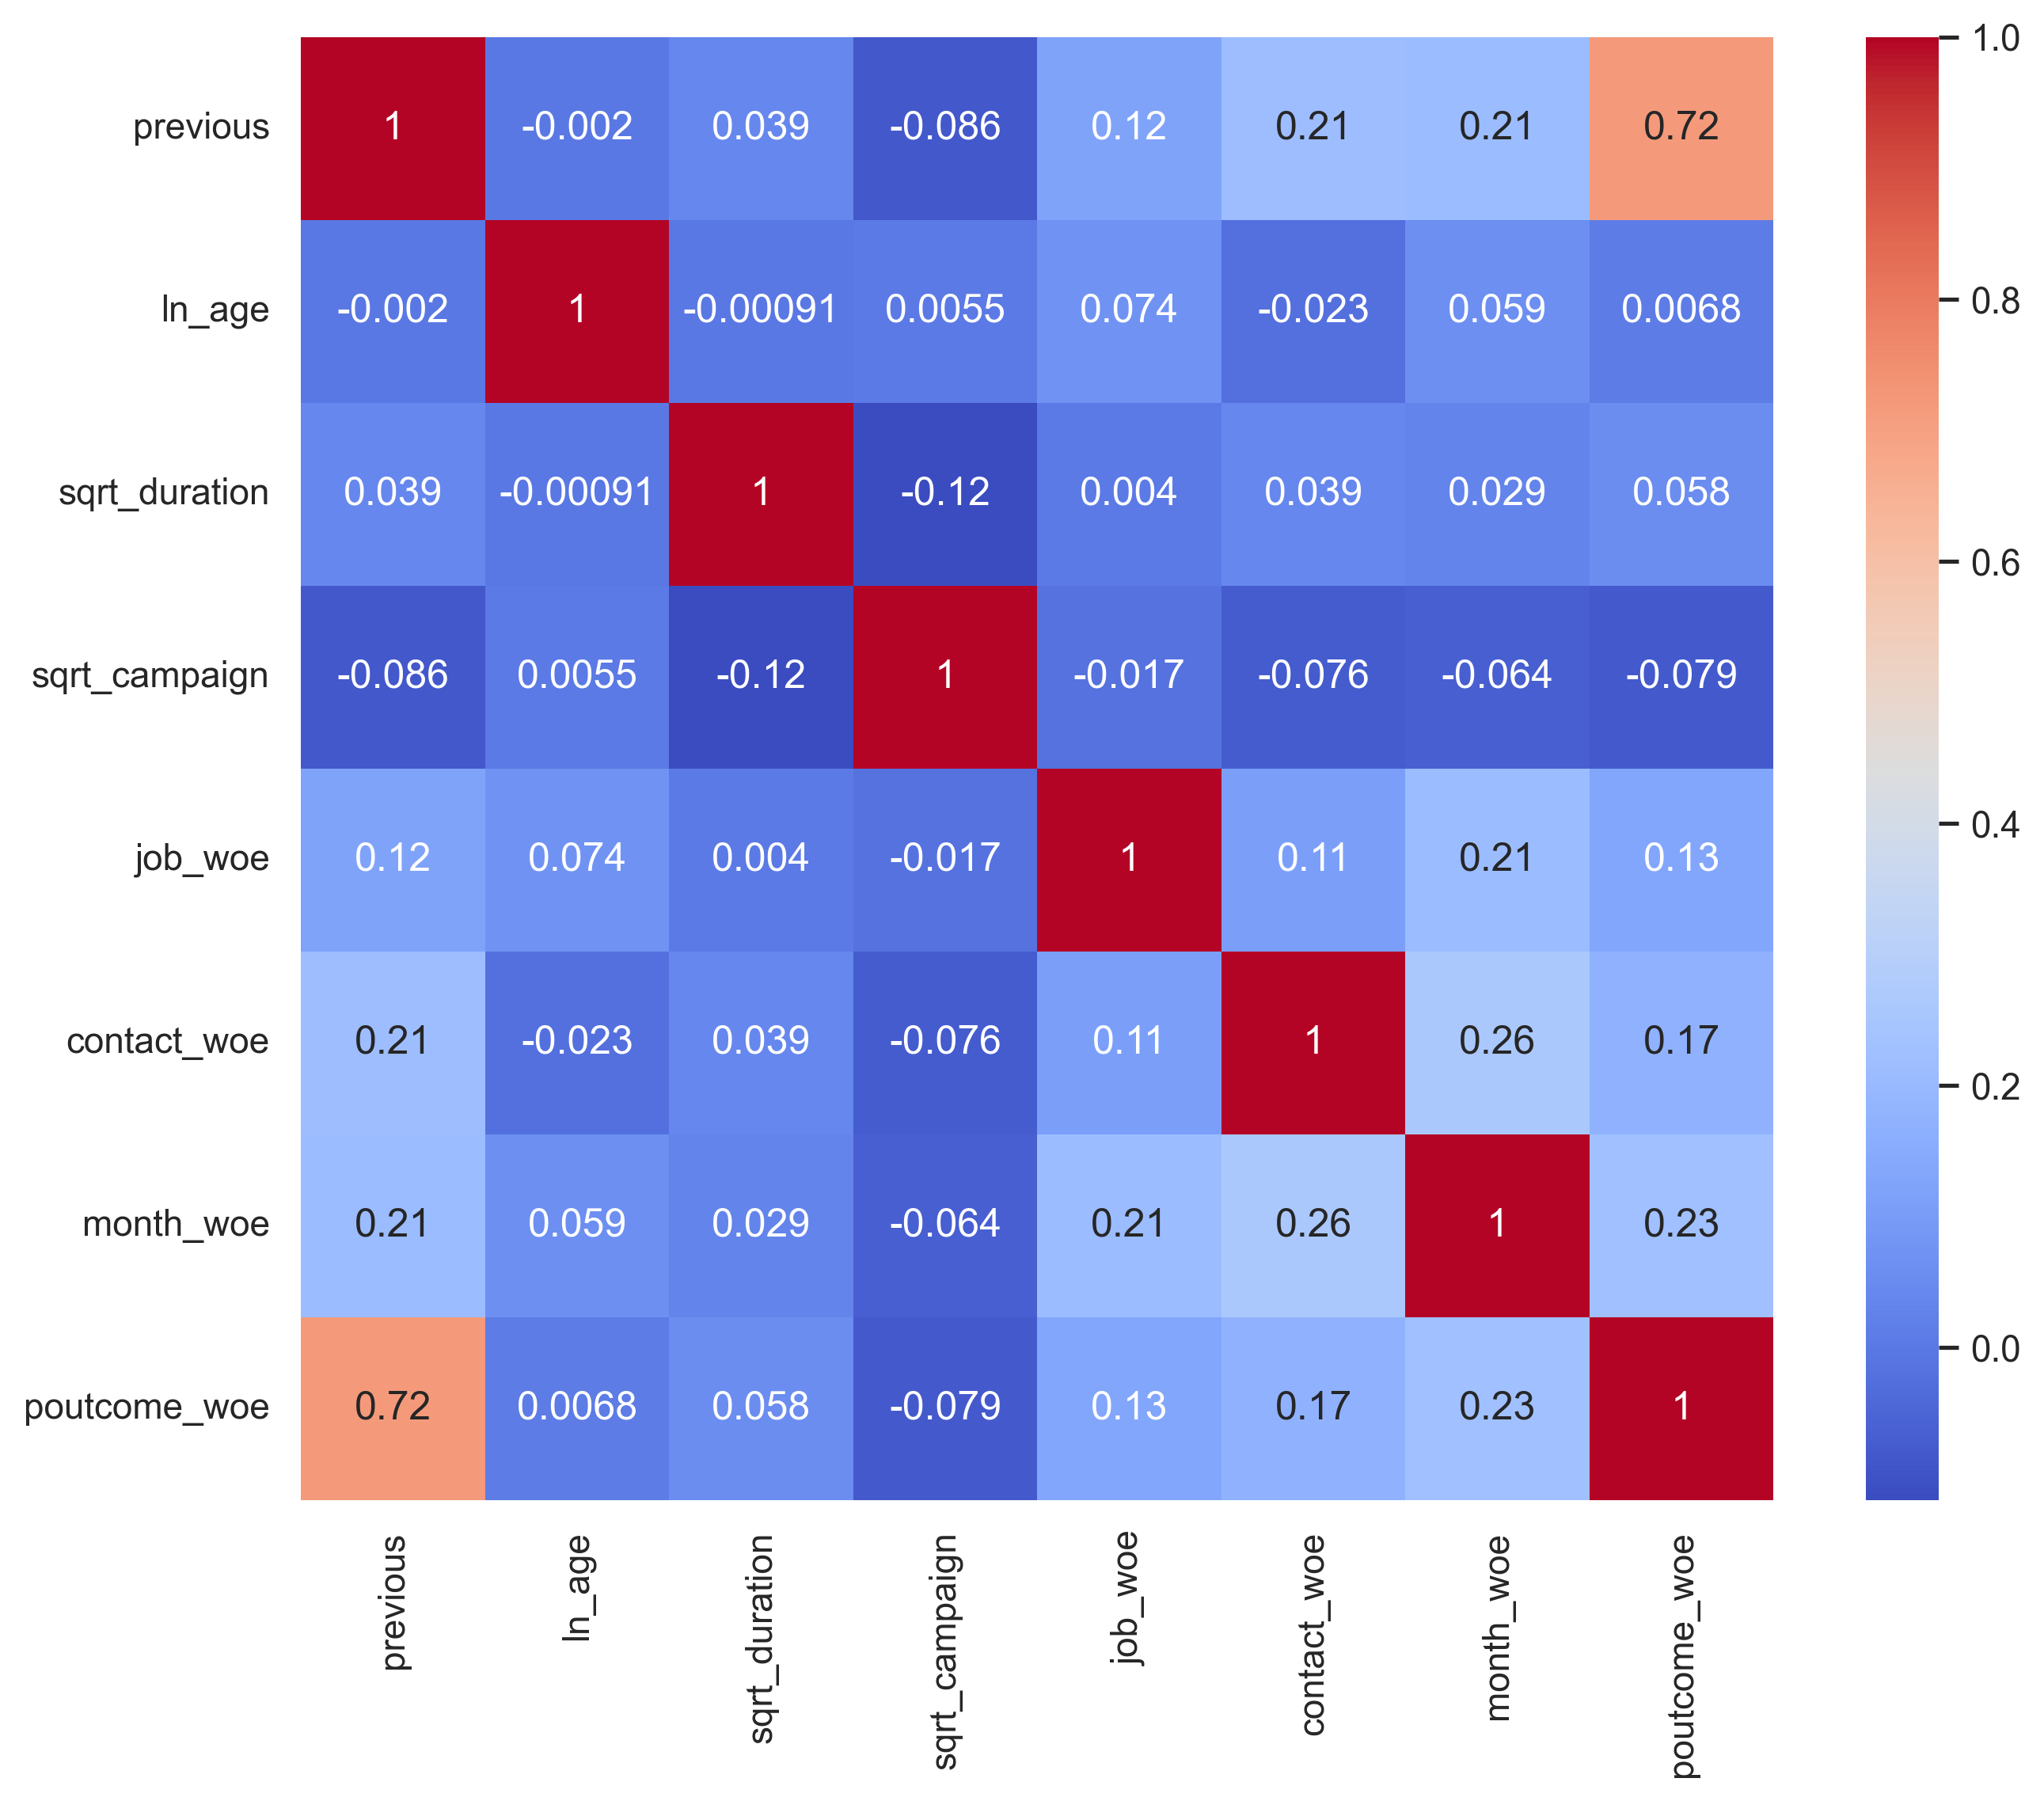

In [38]:
## 变量聚类
# 计算相关系数
input_vars = data_train.drop('labels', axis=1)
corr_matrix = input_vars.corr() # 皮尔森相关系数

# 绘制热图
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
g.set_xticklabels(g.get_xticklabels(), fontsize=12)
g.set_yticklabels(g.get_yticklabels(), fontsize=12)
plt.savefig(fname="输入变量相关系数热图.png")


可以看出'previous'和WOE变换后的'poutcome'相关性强，他们都代表过去活动参与情况，因此进一步给这两个指标提取主成分并命名【past】表示客户的过去的表现影响
#### 3.5.2 PCA降维
从方差贡献率上来看，提取一个主成分的效果较好

In [39]:
# 主成分降维
from sklearn.decomposition import PCA

X = data_train[['previous', 'poutcome_woe']]

pca = PCA(n_components=1) # 保留一个主成分
X_pca = pca.fit_transform(X)

variance_contribution = pca.explained_variance_ratio_[0]
print("第一个主成分的方差贡献率：", variance_contribution)

data_train['past'] = X_pca.flatten()
data_train = data_train.drop(columns=['previous', 'poutcome_woe'])

print(data_train.head())

第一个主成分的方差贡献率： 0.8607462898893999
   labels    ln_age  sqrt_duration  sqrt_campaign   job_woe  contact_woe  \
0       0  3.891820      15.066519       2.000000 -0.534972     0.305771   
1       0  3.610918      14.212670       1.414214 -0.209699    -0.819483   
2       1  4.356709      33.882149       1.000000  0.990506     0.305771   
3       0  3.583519      10.954451       1.414214  0.151384    -0.819483   
4       0  4.077537      19.183326       1.414214  0.990506     0.305771   

   month_woe      past  
0  -0.115089 -0.233184  
1  -0.115089  0.844753  
2  -0.221816 -0.233184  
3  -0.627514 -0.233184  
4  -0.091391 -0.233184  


## 四、不平稳数据处理
### 4.1 数据比例情况
可以看除数据存在不平衡的情况

In [40]:
#--------------------------------4、不平稳数据处理--------------------------------#
from imblearn.over_sampling import SMOTE

## 比例计算
label_counts = data_train['labels'].value_counts()
total_samples = label_counts.sum()
proportion_0 = label_counts[0] / total_samples
proportion_1 = label_counts[1] / total_samples

print(f"labels中【没订阅】的比例为: {proportion_0:.2f}")
print(f"labels中【订阅】的比例为: {proportion_1:.2f}")

labels中【没订阅】的比例为: 0.89
labels中【订阅】的比例为: 0.11


### 4.2 SMOTE过采样

In [41]:
# 过采样SMOTE
X = data_train.drop('labels', axis=1)
y = data_train['labels']

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

data_train_resampled = pd.concat([X_resampled, y_resampled], axis=1)

label_counts_resampled = data_train_resampled['labels'].value_counts()
total_samples_resampled = label_counts_resampled.sum()
proportion_0_resampled = label_counts_resampled[0] / total_samples_resampled
proportion_1_resampled = label_counts_resampled[1] / total_samples_resampled

print(f"过采样后labels中【没订阅】的比例为: {proportion_0_resampled:.2f}")
print(f"过采样后labels中【订阅】的比例为: {proportion_1_resampled:.2f}")

过采样后labels中【没订阅】的比例为: 0.50
过采样后labels中【订阅】的比例为: 0.50


## 五、模型评估与选择
共考虑了以下四种模型：Logistic回归、决策树、SVM分类和KNN分类模型
### 5.1 划分数据
将数据分为训练集70%和测试集30%

In [42]:
#--------------------------------5、模型选择与评估--------------------------------#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve
import numpy as np

## 划分数据
X = data_train_resampled.drop('labels', axis=1)
y = data_train_resampled['labels']

# 训练集70% 测试集30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("训练集特征形状:", X_train.shape)
print("训练集标签形状:", y_train.shape)
print("测试集特征形状:", X_test.shape)
print("测试集标签形状:", y_test.shape)

训练集特征形状: (40933, 7)
训练集标签形状: (40933,)
测试集特征形状: (17543, 7)
测试集标签形状: (17543,)


### 5.2 Logistic回归
#### 5.2.1 模型调参与拟合
考虑penalty=为l2或没有的情况，最终选择【l2】    
考虑正则化系数C=从0.0001到10，最终选择【0.1】  
考虑solver=为'lbfgs'、'liblinear'两种情况，最终选择【lbfgs】  
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [43]:
## logistic回归离散选择
logistic_model = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')  # 调参后相对好的组合
logistic_model.fit(X_train, y_train)

y_logistic_pred = logistic_model.predict(X_test)

#### 5.2.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [44]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_logistic_pred)
print("逻辑回归模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_logistic_pred))

逻辑回归模型预测准确率: 0.8329818161089894
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8752
           1       0.83      0.83      0.83      8791

    accuracy                           0.83     17543
   macro avg       0.83      0.83      0.83     17543
weighted avg       0.83      0.83      0.83     17543



#### 5.2.3 混淆矩阵

[[7307 1445]
 [1485 7306]]


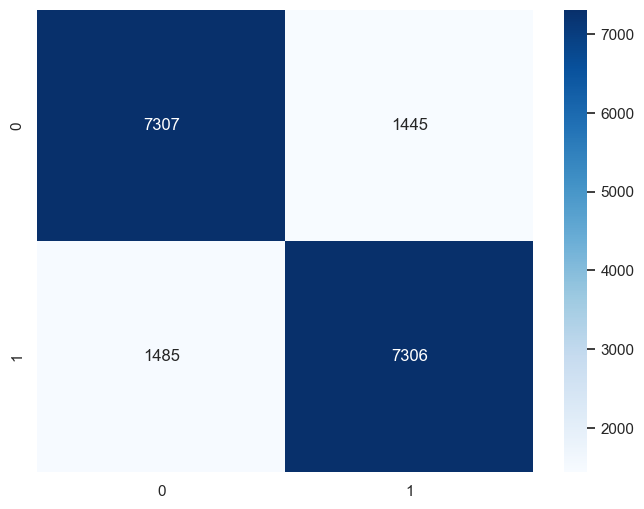

In [45]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_logistic_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="Logistic回归混淆矩阵.png")

#### 5.2.4 Lift曲线

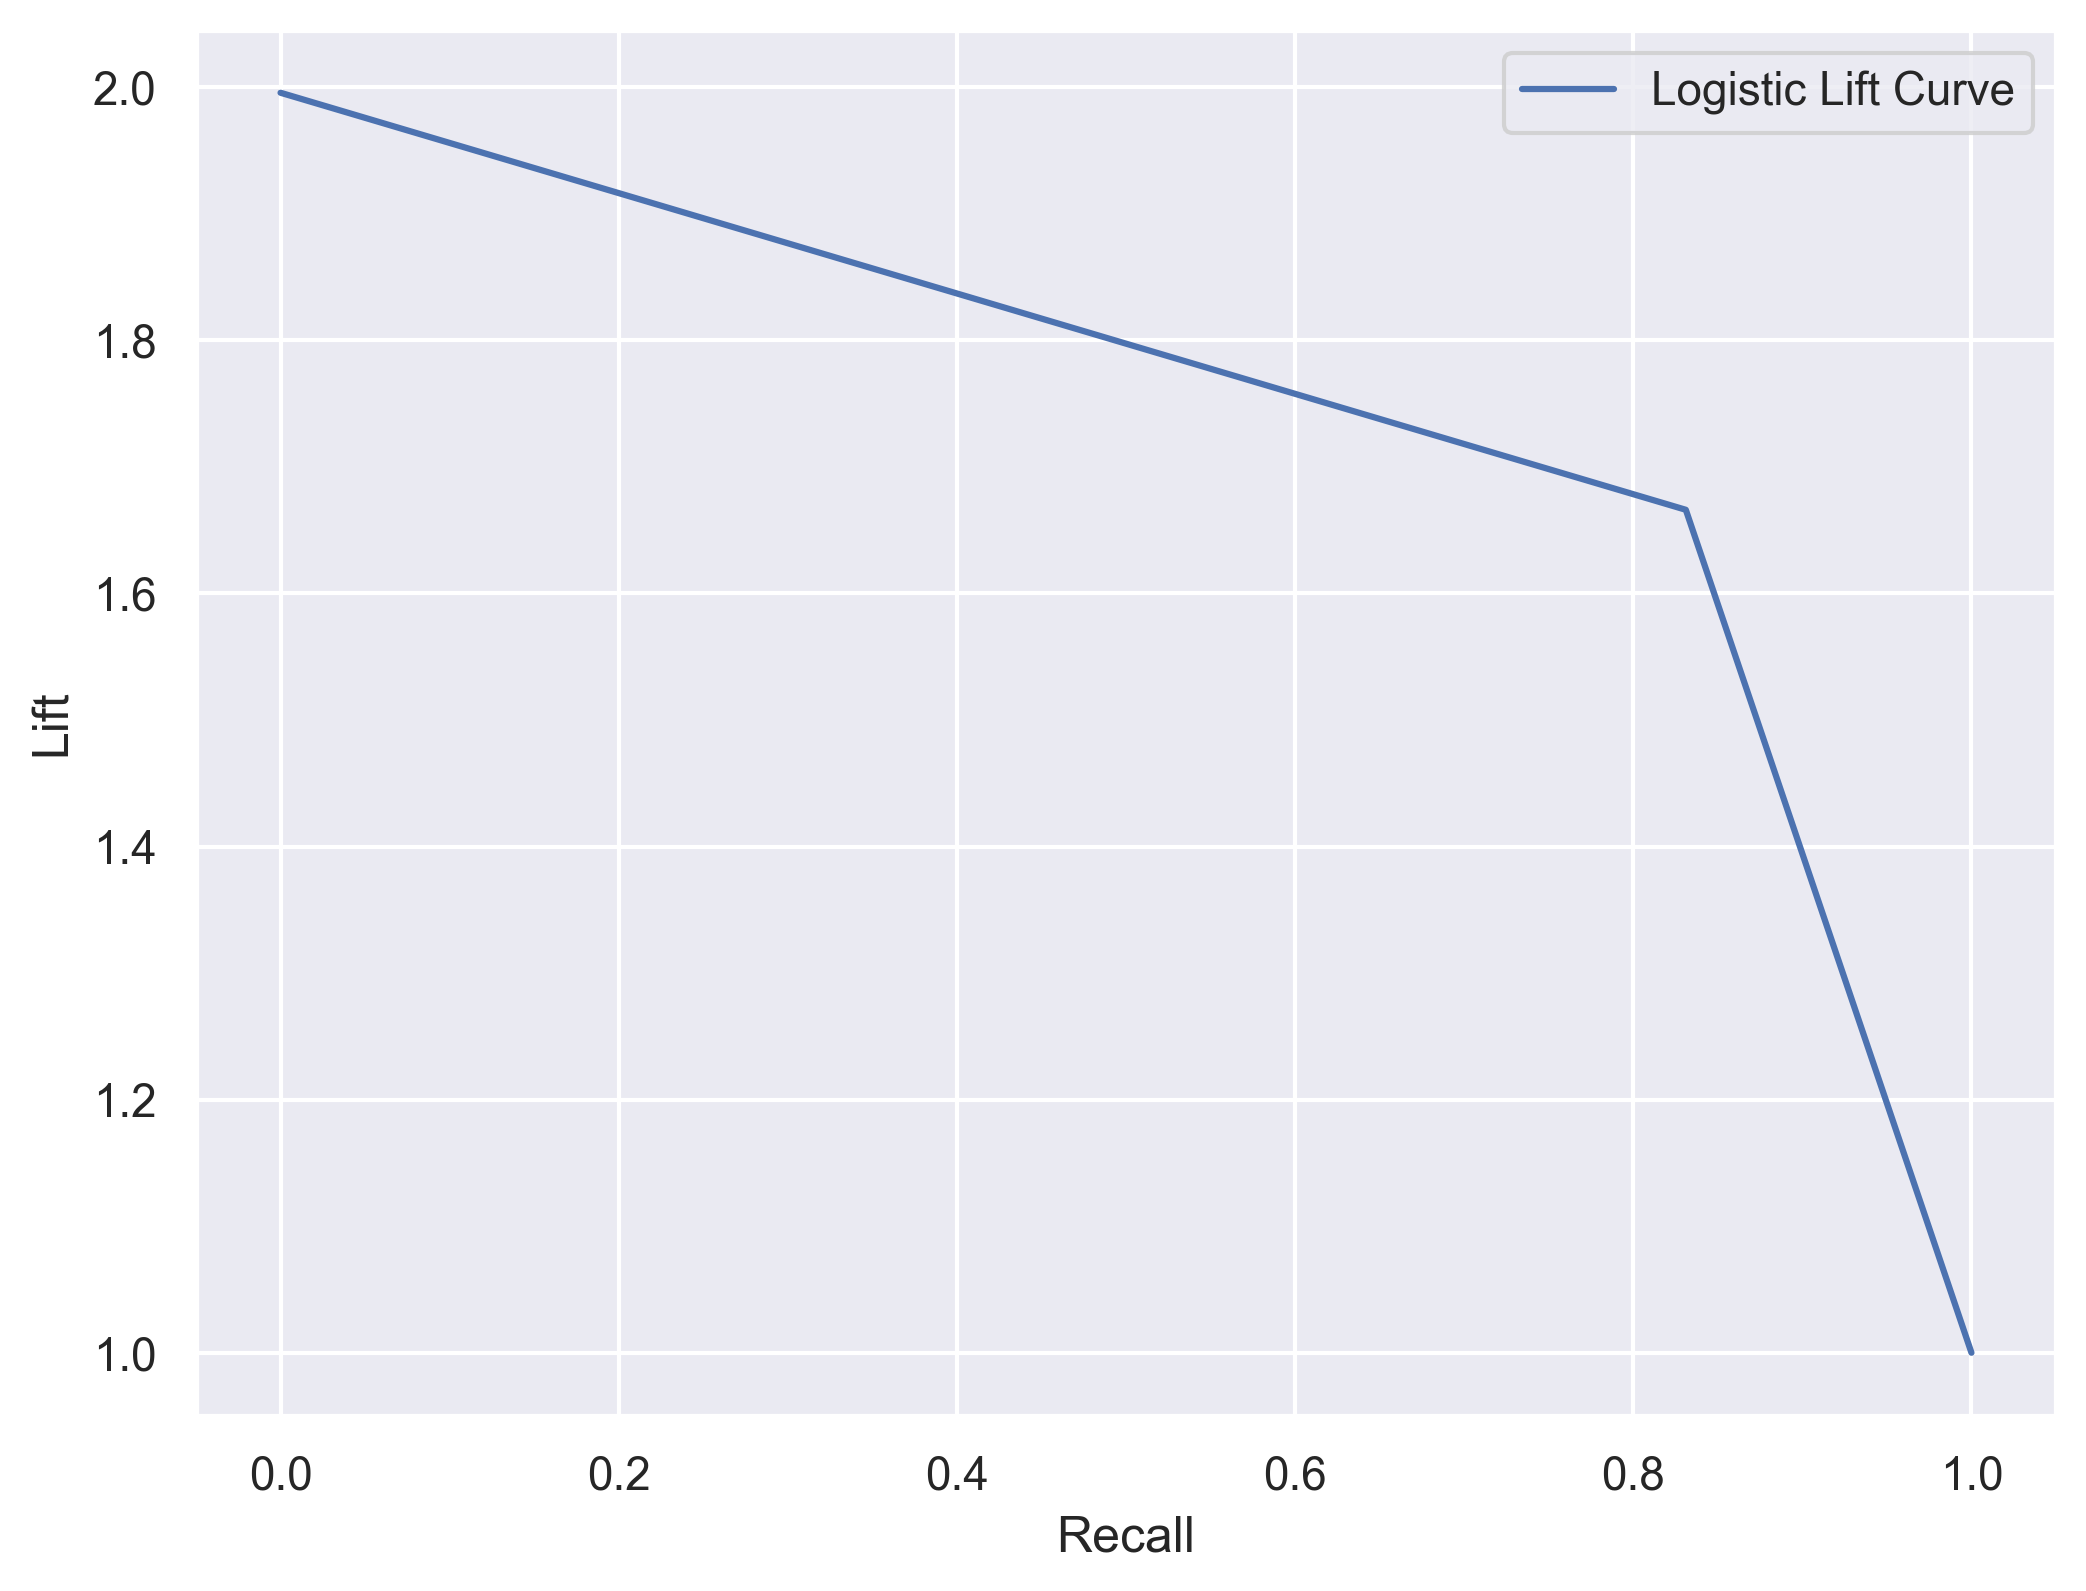

In [47]:
## lift曲线
precision_Logistic, recall_Logistic, thresholds_Logistic = precision_recall_curve(y_test, y_logistic_pred)

lift_Logistic = precision_Logistic / (y_test.sum() / len(y_test))

plt.figure(figsize=(8, 6), dpi = 300)
plt.plot(recall_Logistic, lift_Logistic, label='Logistic Lift Curve')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.legend()
plt.savefig(fname="Logistic回归Lift曲线.png")

### 5.3 决策树
#### 5.3.1 模型调参与拟合
criterion考虑'gini'、'entropy'、'log_loss'，最终选择【'gini'】  
拆分内部节点min_samples_split考虑从100到1000，最总选择【200】   
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [48]:
## 决策树
DecisionTree_model = DecisionTreeClassifier(criterion='gini', min_samples_split=200)
DecisionTree_model.fit(X_train, y_train)

y_DecisionTree_pred = DecisionTree_model.predict(X_test)

#### 5.3.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [49]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_DecisionTree_pred)
print("决策树模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_DecisionTree_pred))

决策树模型预测准确率: 0.8943738243173915
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8752
           1       0.88      0.91      0.90      8791

    accuracy                           0.89     17543
   macro avg       0.89      0.89      0.89     17543
weighted avg       0.89      0.89      0.89     17543



#### 5.3.3 混淆矩阵

[[7691 1061]
 [ 792 7999]]


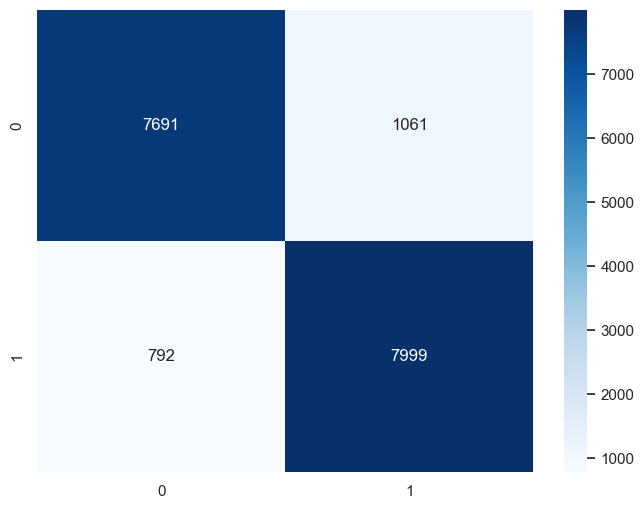

In [50]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_DecisionTree_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="决策树混淆矩阵.png")

#### 5.3.4 Lift曲线
绘制决策树与Logistic回归的Lift曲线对比

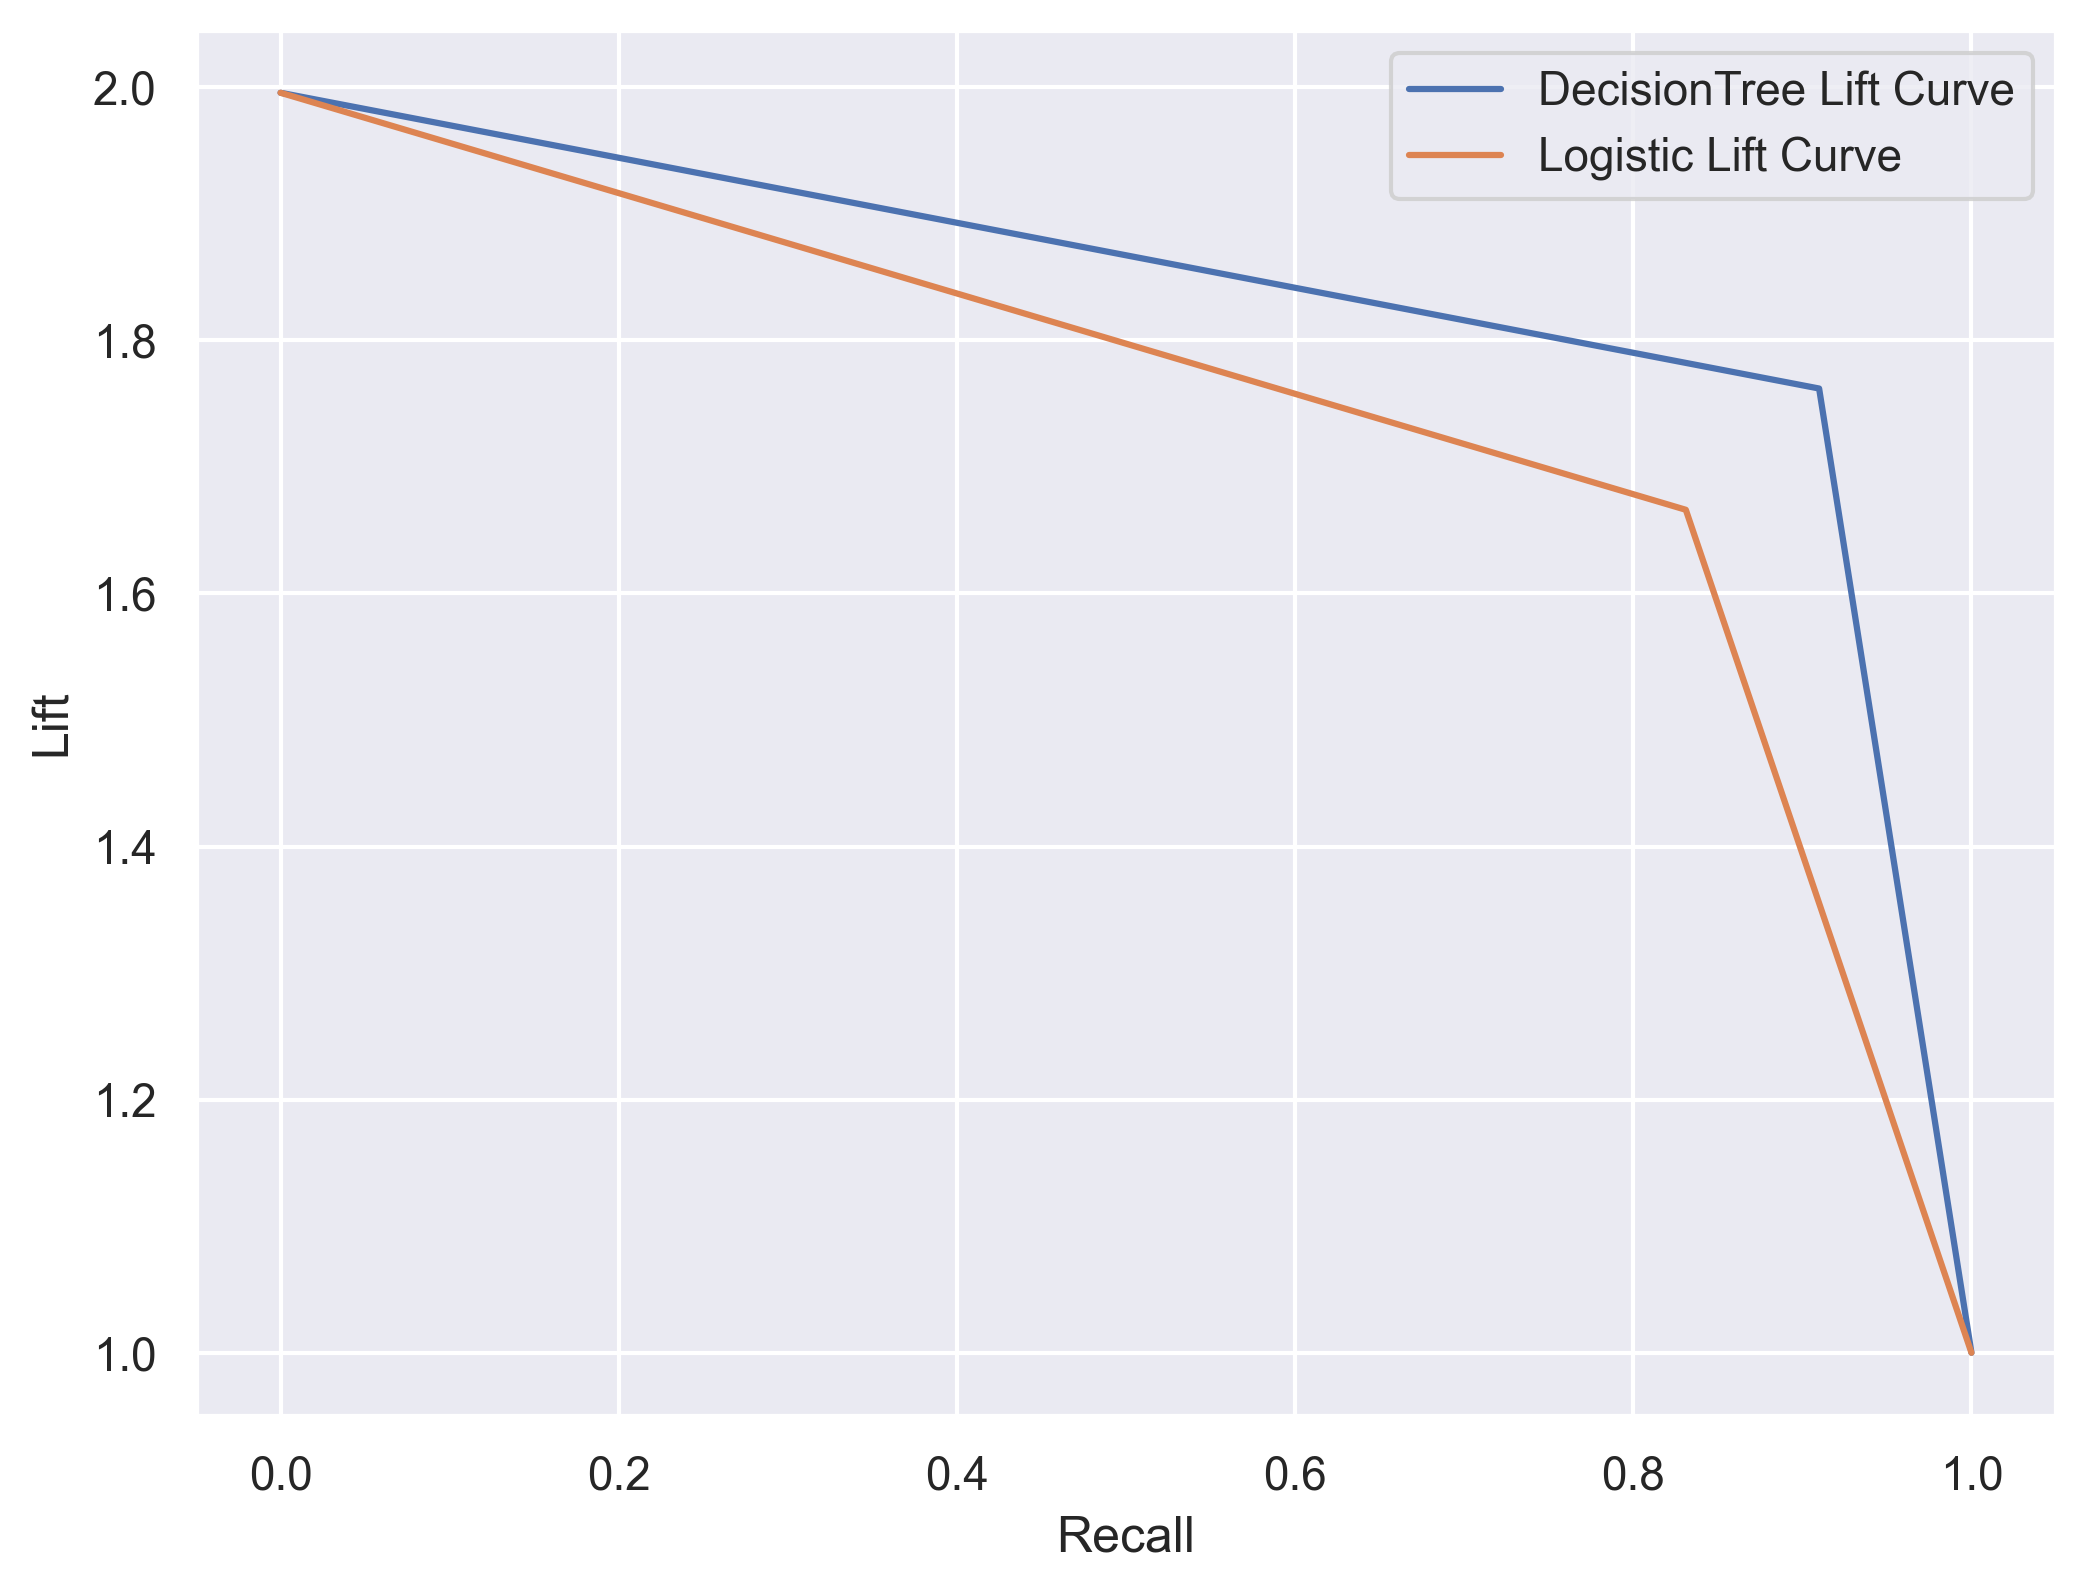

In [51]:
## lift曲线
precision_DecisionTree, recall_DecisionTree, thresholds_DecisionTree = precision_recall_curve(y_test, y_DecisionTree_pred)

lift_DecisionTree = precision_DecisionTree / (y_test.sum() / len(y_test))

plt.figure(figsize=(8, 6), dpi = 300)
plt.plot(recall_DecisionTree, lift_DecisionTree, label='DecisionTree Lift Curve')
plt.plot(recall_Logistic, lift_Logistic, label='Logistic Lift Curve')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.legend()
plt.savefig(fname="决策树Lift曲线.png")

### 5.4 SVM分类
#### 5.4.1 模型调参与拟合
核函数根据数据性质选择kernel=【'rbf'】    
gamma考虑从1到100，最终选择【10】  
正则化系数C考虑0.01到10，最终选择【1】  
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [52]:
## SVM分类
SVM_model = svm.SVC(kernel='rbf' ,gamma=10, C=1)
SVM_model.fit(X_train, y_train)

y_SVM_pred = SVM_model.predict(X_test)


#### 5.4.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [53]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_SVM_pred)
print("SVM分类模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_SVM_pred))

SVM分类模型预测准确率: 0.9275494499230462
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      8752
           1       0.91      0.95      0.93      8791

    accuracy                           0.93     17543
   macro avg       0.93      0.93      0.93     17543
weighted avg       0.93      0.93      0.93     17543



#### 5.4.3 混淆矩阵

[[7918  834]
 [ 437 8354]]


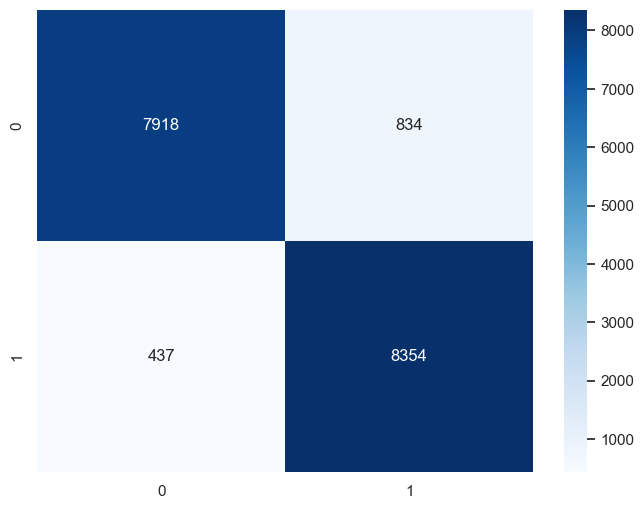

In [54]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_SVM_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="SVM混淆矩阵.png")

#### 5.4.4 Lift曲线
绘制SVM、决策树与Logistic回归的Lift曲线对比

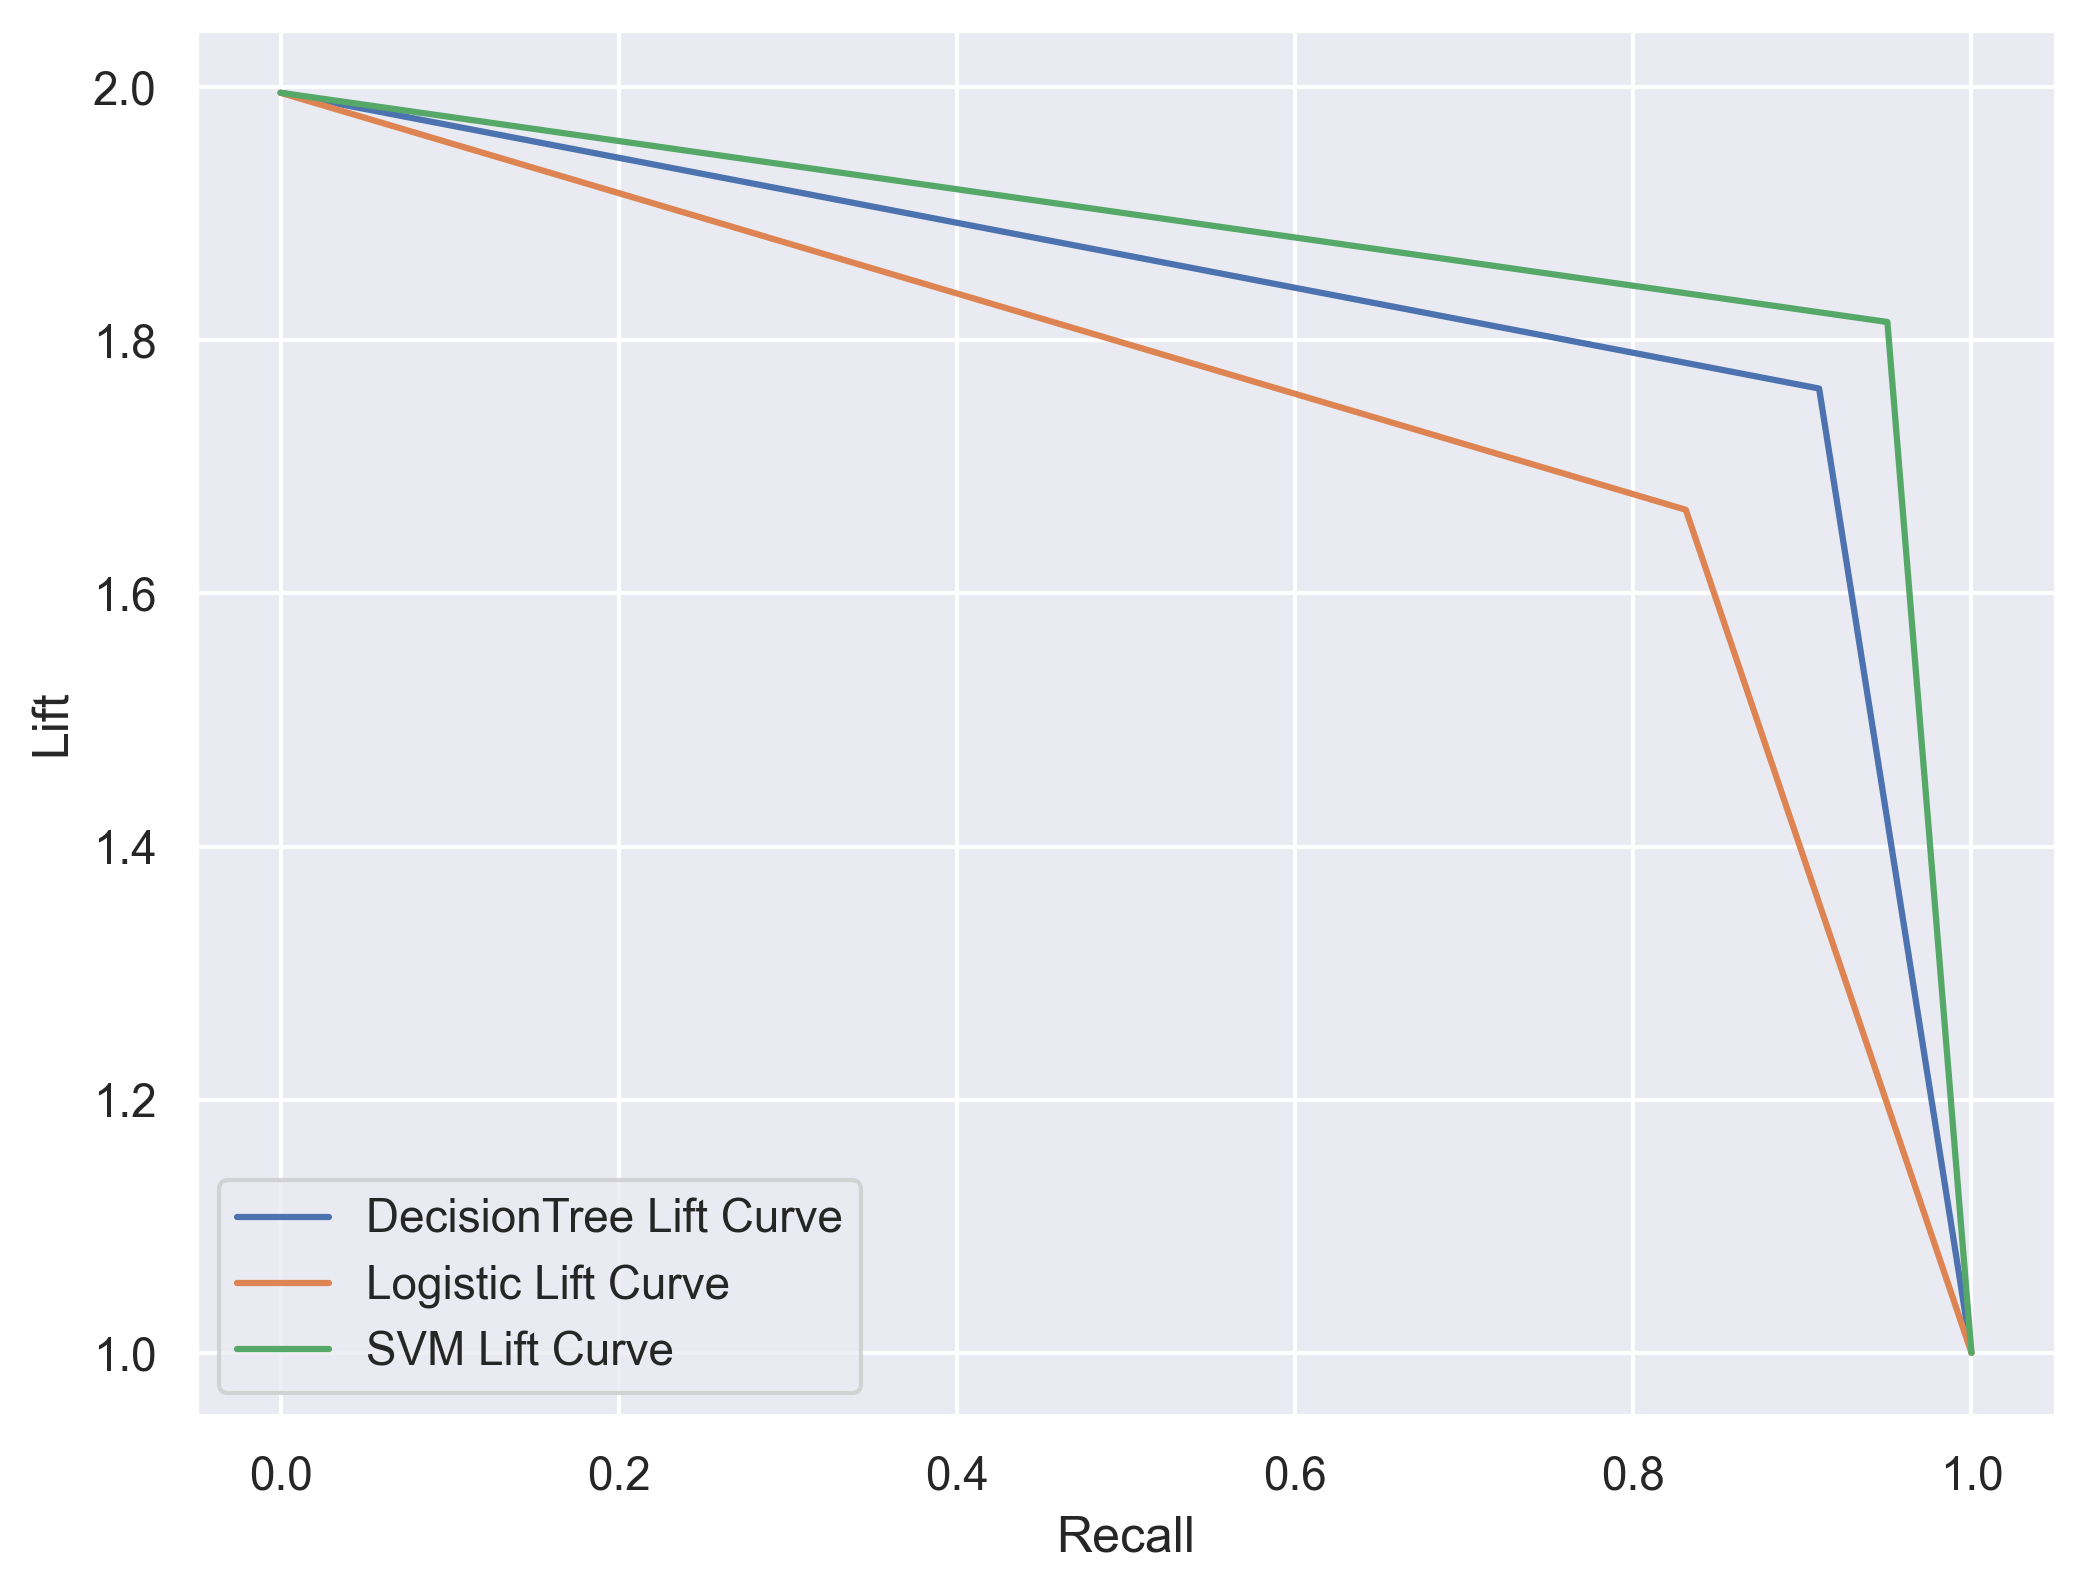

In [55]:
## lift曲线
precision_SVM, recall_SVM, thresholds_SVM = precision_recall_curve(y_test, y_SVM_pred)

lift_SVM = precision_SVM / (y_test.sum() / len(y_test))

plt.figure(figsize=(8, 6), dpi = 300)
plt.plot(recall_DecisionTree, lift_DecisionTree, label='DecisionTree Lift Curve')
plt.plot(recall_Logistic, lift_Logistic, label='Logistic Lift Curve')
plt.plot(recall_SVM, lift_SVM, label='SVM Lift Curve')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.legend()
plt.savefig(fname="SVM Lift曲线.png")

### 5.5 KNN分类
#### 5.5.1 模型调参与拟合
n_neighbors考虑从2到50，最终选择【2】  
计算距离的方式选择metric=【'minkowski'】  
权重选择weights=【'distance'】  
选择标准为F1得分和Lift曲线  
具体选择流程不做赘述

In [56]:
## KNN分类
KNN_model = KNeighborsClassifier(n_neighbors=2, metric='minkowski', weights='distance') 
KNN_model.fit(X_train, y_train)

y_KNN_pred = KNN_model.predict(X_test)

#### 5.5.2 模型评估
##### 准确率Accuracy
正确分类的样本数占总样本数的比例
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
##### 精确率precision
被分类器预测为正类的样本中，真正为正类的样本所占的比例
$$Precision = \frac{TP}{TP+FP}$$
##### 召回率recall
真正为正类的样本中，被分类器预测为正类的样本所占的比例
$$Recall = \frac{TP}{TP+FN}$$
##### F1值f1score
综合考虑精确率和召回率，精确率和召回率的调和平均数
$$F1 = \frac{2 Precision Recall}{Precision+Recall}$$

In [57]:
# 准确率Accuracy--正确分类的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_KNN_pred)
print("KNN模型预测准确率:", accuracy)

# 精确率precision--被分类器预测为正类的样本中，真正为正类的样本所占的比例
# 召回率recall--真正为正类的样本中，被分类器预测为正类的样本所占的比例
# F1值f1score--综合考虑精确率和召回率，精确率和召回率的调和平均数
print(classification_report(y_test, y_KNN_pred))

KNN模型预测准确率: 0.9289175169583309
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      8752
           1       0.89      0.97      0.93      8791

    accuracy                           0.93     17543
   macro avg       0.93      0.93      0.93     17543
weighted avg       0.93      0.93      0.93     17543



#### 5.5.3 混淆矩阵

[[7728 1024]
 [ 223 8568]]


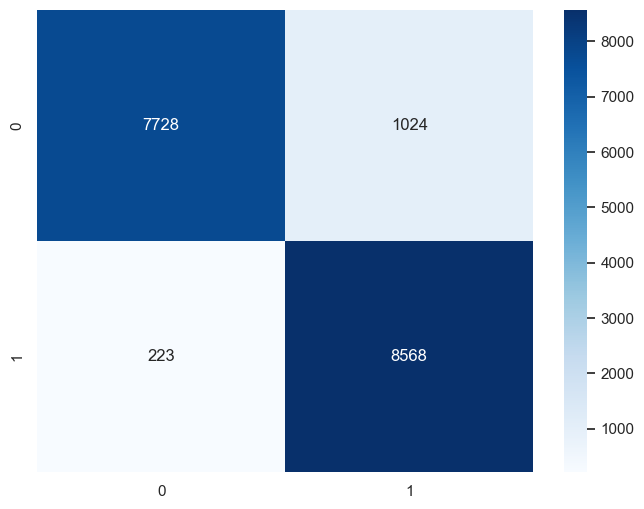

In [58]:
## 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_KNN_pred)
print(conf_matrix)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.savefig(fname="KNN混淆矩阵.png")

#### 5.5.4 Lift曲线
绘制KNN、SVM、决策树与Logistic回归的Lift曲线对比

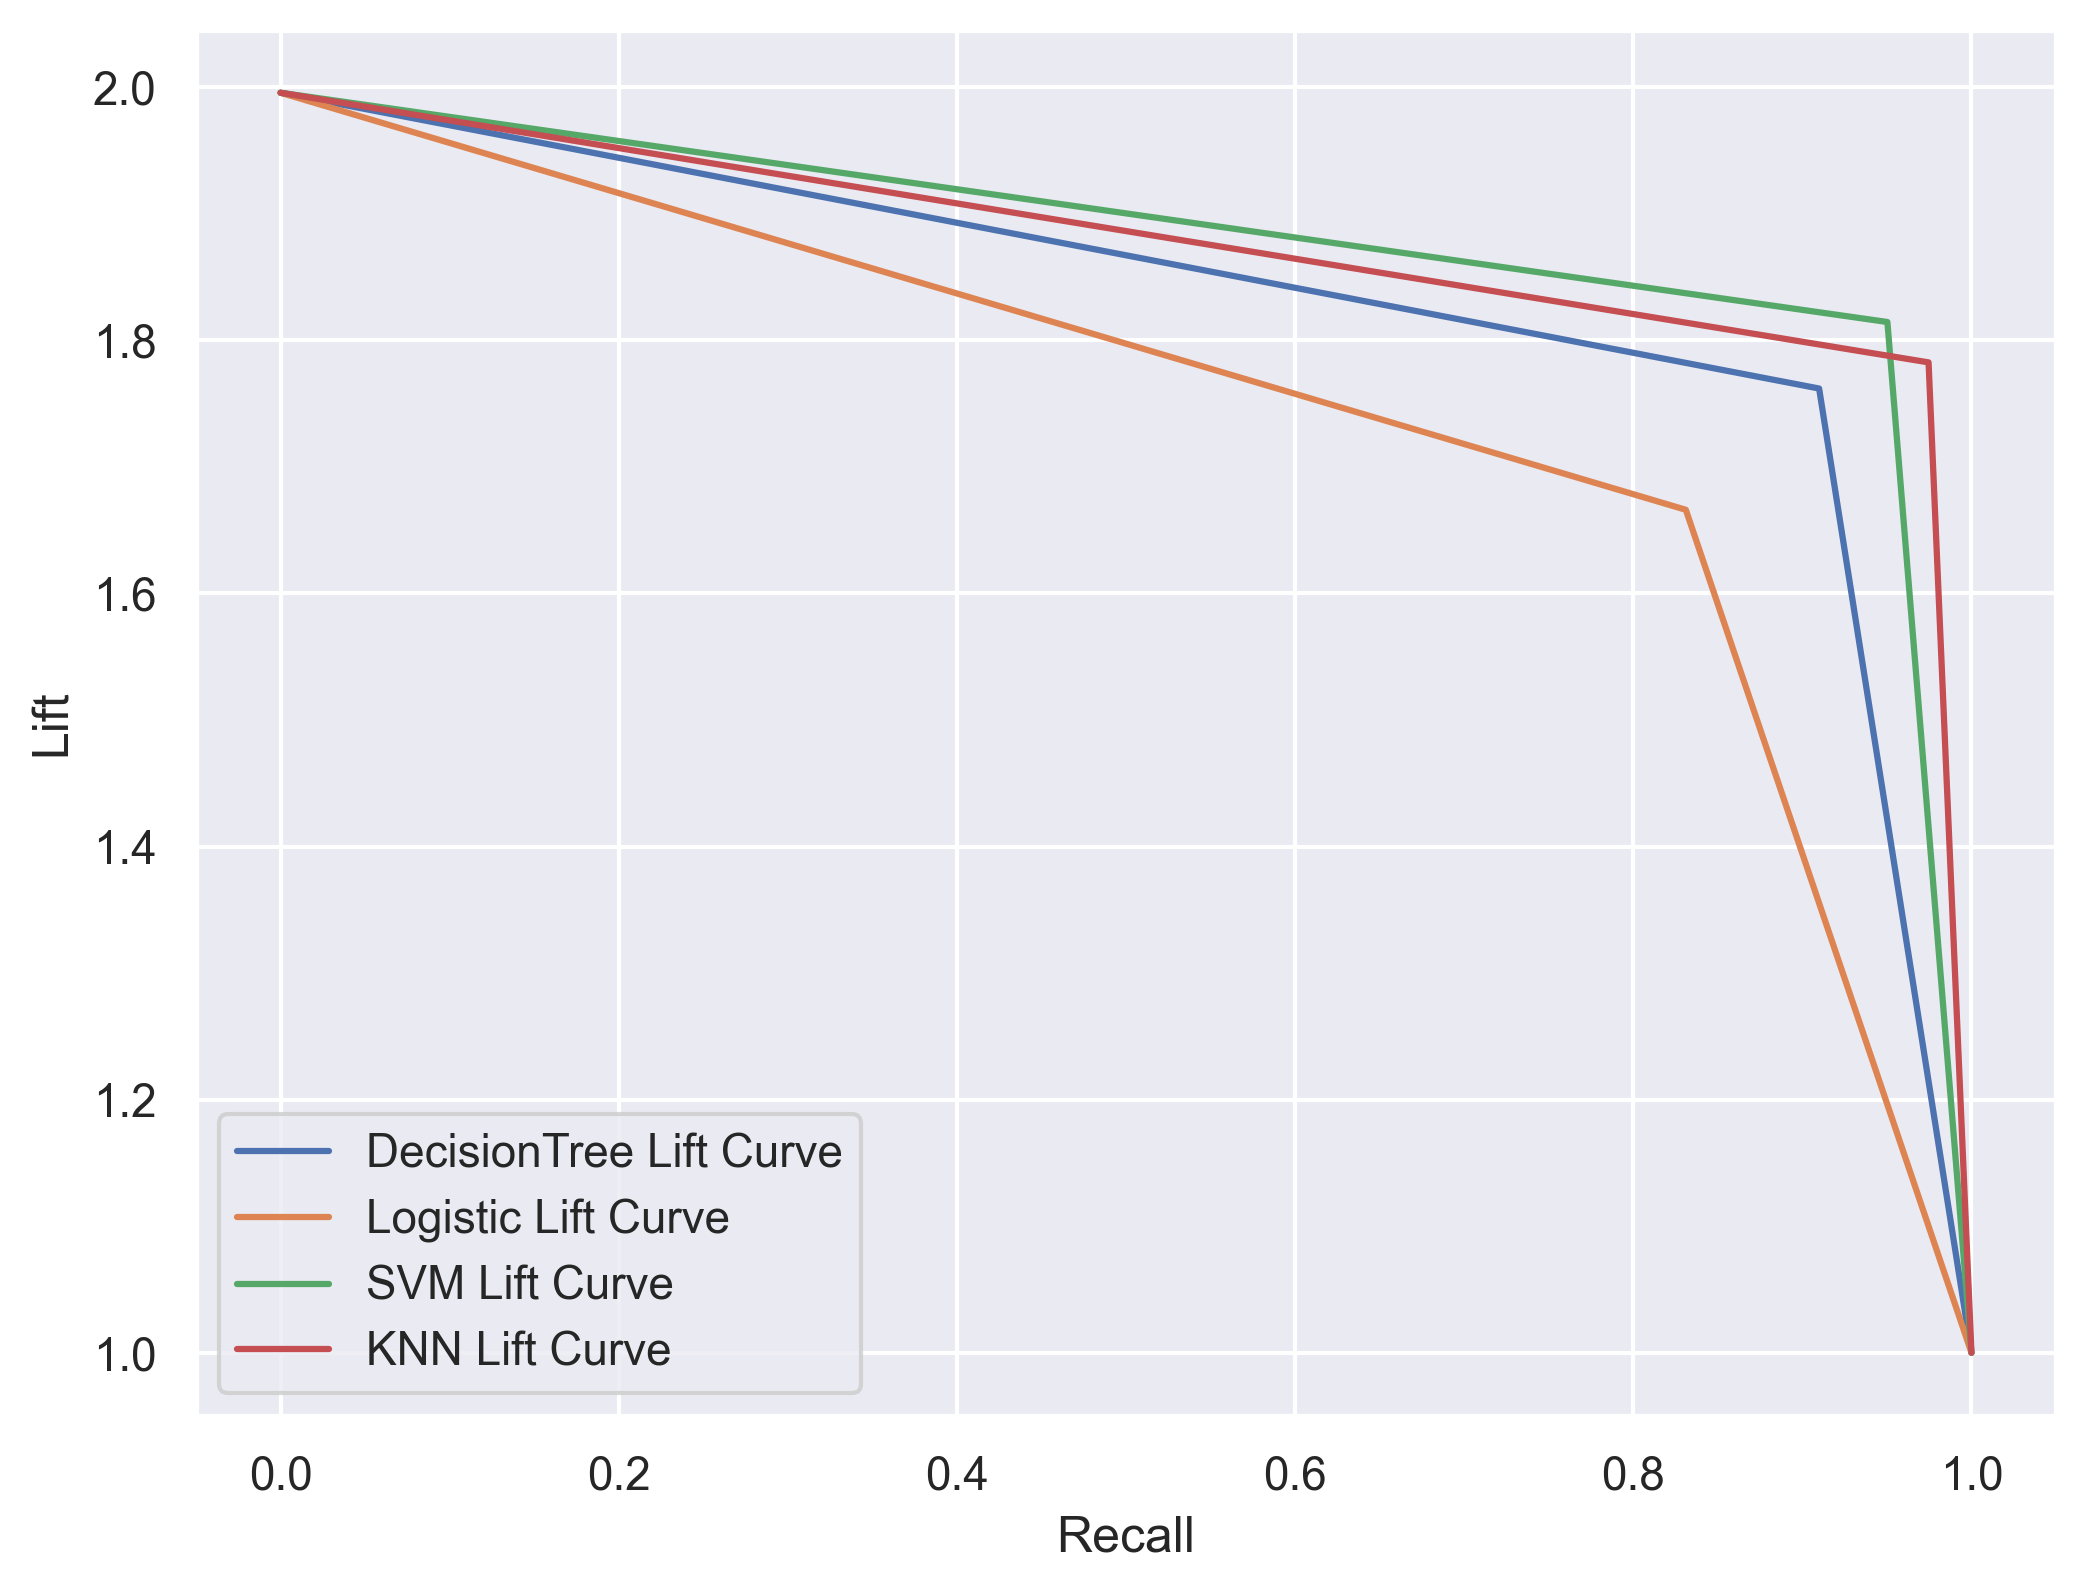

In [60]:
## lift曲线
precision_KNN, recall_KNN, thresholds_KNN = precision_recall_curve(y_test, y_KNN_pred)

lift_KNN = precision_KNN / (y_test.sum() / len(y_test))

plt.figure(figsize=(8, 6), dpi = 300)
plt.plot(recall_DecisionTree, lift_DecisionTree, label='DecisionTree Lift Curve')
plt.plot(recall_Logistic, lift_Logistic, label='Logistic Lift Curve')
plt.plot(recall_SVM, lift_SVM, label='SVM Lift Curve')
plt.plot(recall_KNN, lift_KNN, label='KNN Lift Curve')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.legend()
plt.savefig(fname="KNN Lift曲线.png")

### 5.6 模型选择
对比Lift曲线发现：模型拟合效果：KNN=SVM>决策树>Logistic回归

## 六、模型运用
使用KNN模型。。。